# **A. Problem Statement and Dataset**

---
### **Parkinsons Disease**:

* Parkinson's disease is a progressive neurological disorder that affects movement.
* It occurs due to the loss of dopamine-producing neurons in the brain, leading to symptoms like tremors (involuntary, rhythmic shaking movements, most commonly affecting the hands and arms), stiffness, slow movement, and balance problems
* While there is no cure, treatments like medication and therapy can help manage symptoms.
---

### **1. Importing Libraries**

In [4]:
# Basic Python Libraries
import pandas as pd
import numpy as np

import statsmodels.formula.api as smf
import scipy.stats as stats

### **2. Reading Data**

In [7]:
df = pd.read_csv('parkinsons_updrs.csv')
df = df[:5875]
df.head()

subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         1   72    0     5.6431       28.199       34.398    0.00662   
1         1   72    0    12.6660       28.447       34.894    0.00300   
2         1   72    0    19.6810       28.695       35.389    0.00481   
3         1   72    0    25.6470       28.905       35.810    0.00528   
4         1   72    0    33.6420       29.187       36.375    0.00335   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0     0.000034     0.00401      0.00317  ...        0.230       0.01438   
1     0.000017     0.00132      0.00150  ...        0.179       0.00994   
2     0.000025     0.00205      0.00208  ...        0.181       0.00734   
3     0.000027     0.00191      0.00264  ...        0.327       0.01106   
4     0.000020     0.00093      0.00130  ...        0.176       0.00679   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.01309        0.01662      0.04314  0.014290  21.640  0.41888   
1       0.01072        0.01689      0.02982  0.011112  27.183  0.43493   
2       0.00844        0.01458      0.02202  0.020220  23.047  0.46222   
3       0.01265        0.01963      0.03317  0.027837  24.445  0.48730   
4       0.00929        0.01819      0.02036  0.011625  26.126  0.47188   

       DFA      PPE  
0  0.54842  0.16006  
1  0.56477  0.10810  
2  0.54405  0.21014  
3  0.57794  0.33277  
4  0.56122  0.19361  

[5 rows x 22 columns]

##### **DATA EXPLANATION:**
* The data corresponds to 42 individual who have been monitored for 6 months, and observations are taken over a given time interval.
* There are two Response Varibales, `Motor_UTDRS` & `Total_UTDRS` and there are 18 Predictor variables like `age`, `sex` and `16 biomedical voice measures`.
* UPDRS stands for `Unified Parkinson’s Disease Rating Scale`.
* There are around 200 observations per patient.

##### **FEATURES:**
* **Jitter(%), Jitter(Abs), Jitter:RAP, Jitter:PPQ5, Jitter:DDP**
  - Also known as Jitter series. Measures of vocal jitter, which is a variation in fundamental `frequency` (pitch) from one cycle to the next. These are often used in voice analysis, potentially related to speech impairments.
* **Shimmer, Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, Shimmer:APQ11, Shimmer:DDA**
 - Also known as Shimmer series. Measures of vocal shimmer, which is a variation in `amplitude` (loudness) from one cycle to the next. Also used in voice analysis.
* **NHR**: Noise-to-Harmonics Ratio, a measure of the amount of noise in the voice signal.
* **HNR**: Harmonics-to-Noise Ratio, the inverse of NHR, representing the amount of harmonic (periodic) energy relative to noise.
* **RPDE**: Recurrence Period Density Entropy, a measure of non-linear dynamics in voice.
* **DFA**: Detrended Fluctuation Analysis, a measure of fractal-like scaling properties in voice.
* **PPE**: Pitch Period Entropy, another measure of non-linear dynamics in voice.

In [10]:
df.tail()

subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
5870        42   61    0     142.79       22.485       33.485    0.00406   
5871        42   61    0     149.84       21.988       32.988    0.00297   
5872        42   61    0     156.82       21.495       32.495    0.00349   
5873        42   61    0     163.73       21.007       32.007    0.00281   
5874        42   61    0     170.73       20.513       31.513    0.00282   

      Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
5870     0.000031     0.00167      0.00168  ...        0.160       0.00973   
5871     0.000025     0.00119      0.00147  ...        0.215       0.01052   
5872     0.000025     0.00152      0.00187  ...        0.244       0.01371   
5873     0.000020     0.00128      0.00151  ...        0.131       0.00693   
5874     0.000021     0.00135      0.00166  ...        0.171       0.00946   

      Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
5870       0.01133        0.01549      0.02920  0.025137  22.369  0.64215   
5871       0.01277        0.01904      0.03157  0.011927  22.886  0.52598   
5872       0.01456        0.01877      0.04112  0.017701  25.065  0.47792   
5873       0.00870        0.01307      0.02078  0.007984  24.422  0.56865   
5874       0.01154        0.01470      0.02839  0.008172  23.259  0.58608   

          DFA      PPE  
5870  0.55314  0.21367  
5871  0.56518  0.12621  
5872  0.57888  0.14157  
5873  0.56327  0.14204  
5874  0.57077  0.15336  

[5 rows x 22 columns]

In [11]:
print(df.shape)

(5875, 22)


In [12]:
# Columns of the dataset
print("Columns: \n")
j = 1
for i in df.columns:
  print(f"{j}. {i}")
  j = j + 1

Columns: 

1. subject#
2. age
3. sex
4. test_time
5. motor_UPDRS
6. total_UPDRS
7. Jitter(%)
8. Jitter(Abs)
9. Jitter:RAP
10. Jitter:PPQ5
11. Jitter:DDP
12. Shimmer
13. Shimmer(dB)
14. Shimmer:APQ3
15. Shimmer:APQ5
16. Shimmer:APQ11
17. Shimmer:DDA
18. NHR
19. HNR
20. RPDE
21. DFA
22. PPE


# **B. Exploratory Data Analysis**

In [14]:
# Data visulaization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Minimal and elegant theme
sns.set_theme(style="white", palette="colorblind", font_scale=1.2)

# Matplotlib tweaks for clean visuals
plt.rcParams.update({
    # "figure.figsize": (10, 6),
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.spines.left": True,
    "axes.spines.bottom": True,
    "grid.alpha": 0.1,  # No default grid lines
})

# Optional: for Jupyter notebooks
%matplotlib inline

### **1. Checking for missing and duplicate values**

In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

In [18]:
print(df.isnull().sum())

subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64


In [19]:
print(df.duplicated().sum())

0


##### **INSIGHTS:**
* There is no Missing value in the data.
* There only one categorical features, namely `sex`.
* There are no dublicated values in the data.

### **2. Summary Statistics**

In [22]:
df.describe().T

count       mean        std        min        25%        50%  \
subject#       5875.0  21.494128  12.372279   1.000000  10.000000  22.000000   
age            5875.0  64.804936   8.821524  36.000000  58.000000  65.000000   
sex            5875.0   0.317787   0.465656   0.000000   0.000000   0.000000   
test_time      5875.0  92.863722  53.445602  -4.262500  46.847500  91.523000   
motor_UPDRS    5875.0  21.296229   8.129282   5.037700  15.000000  20.871000   
total_UPDRS    5875.0  29.018942  10.700283   7.000000  21.371000  27.576000   
Jitter(%)      5875.0   0.006154   0.005624   0.000830   0.003580   0.004900   
Jitter(Abs)    5875.0   0.000044   0.000036   0.000002   0.000022   0.000035   
Jitter:RAP     5875.0   0.002987   0.003124   0.000330   0.001580   0.002250   
Jitter:PPQ5    5875.0   0.003277   0.003732   0.000430   0.001820   0.002490   
Jitter:DDP     5875.0   0.008962   0.009371   0.000980   0.004730   0.006750   
Shimmer        5875.0   0.034035   0.025835   0.003060   0.019120   0.027510   
Shimmer(dB)    5875.0   0.310960   0.230254   0.026000   0.175000   0.253000   
Shimmer:APQ3   5875.0   0.017156   0.013237   0.001610   0.009280   0.013700   
Shimmer:APQ5   5875.0   0.020144   0.016664   0.001940   0.010790   0.015940   
Shimmer:APQ11  5875.0   0.027481   0.019986   0.002490   0.015665   0.022710   
Shimmer:DDA    5875.0   0.051467   0.039711   0.004840   0.027830   0.041110   
NHR            5875.0   0.032120   0.059692   0.000286   0.010955   0.018448   
HNR            5875.0  21.679495   4.291096   1.659000  19.406000  21.920000   
RPDE           5875.0   0.541473   0.100986   0.151020   0.469785   0.542250   
DFA            5875.0   0.653240   0.070902   0.514040   0.596180   0.643600   
PPE            5875.0   0.219589   0.091498   0.021983   0.156340   0.205500   

                      75%         max  
subject#        33.000000   42.000000  
age             72.000000   85.000000  
sex              1.000000    1.000000  
test_time      138.445000  215.490000  
motor_UPDRS     27.596500   39.511000  
total_UPDRS     36.399000   54.992000  
Jitter(%)        0.006800    0.099990  
Jitter(Abs)      0.000053    0.000446  
Jitter:RAP       0.003290    0.057540  
Jitter:PPQ5      0.003460    0.069560  
Jitter:DDP       0.009870    0.172630  
Shimmer          0.039750    0.268630  
Shimmer(dB)      0.365000    2.107000  
Shimmer:APQ3     0.020575    0.162670  
Shimmer:APQ5     0.023755    0.167020  
Shimmer:APQ11    0.032715    0.275460  
Shimmer:DDA      0.061735    0.488020  
NHR              0.031463    0.748260  
HNR             24.444000   37.875000  
RPDE             0.614045    0.966080  
DFA              0.711335    0.865600  
PPE              0.264490    0.731730

##### **INSIGHTS:**
- Sex Distribution: The mean for `sex` is 0.317787, indicating a possible imbalance in the dataset.   



### **3. Distribution of features**

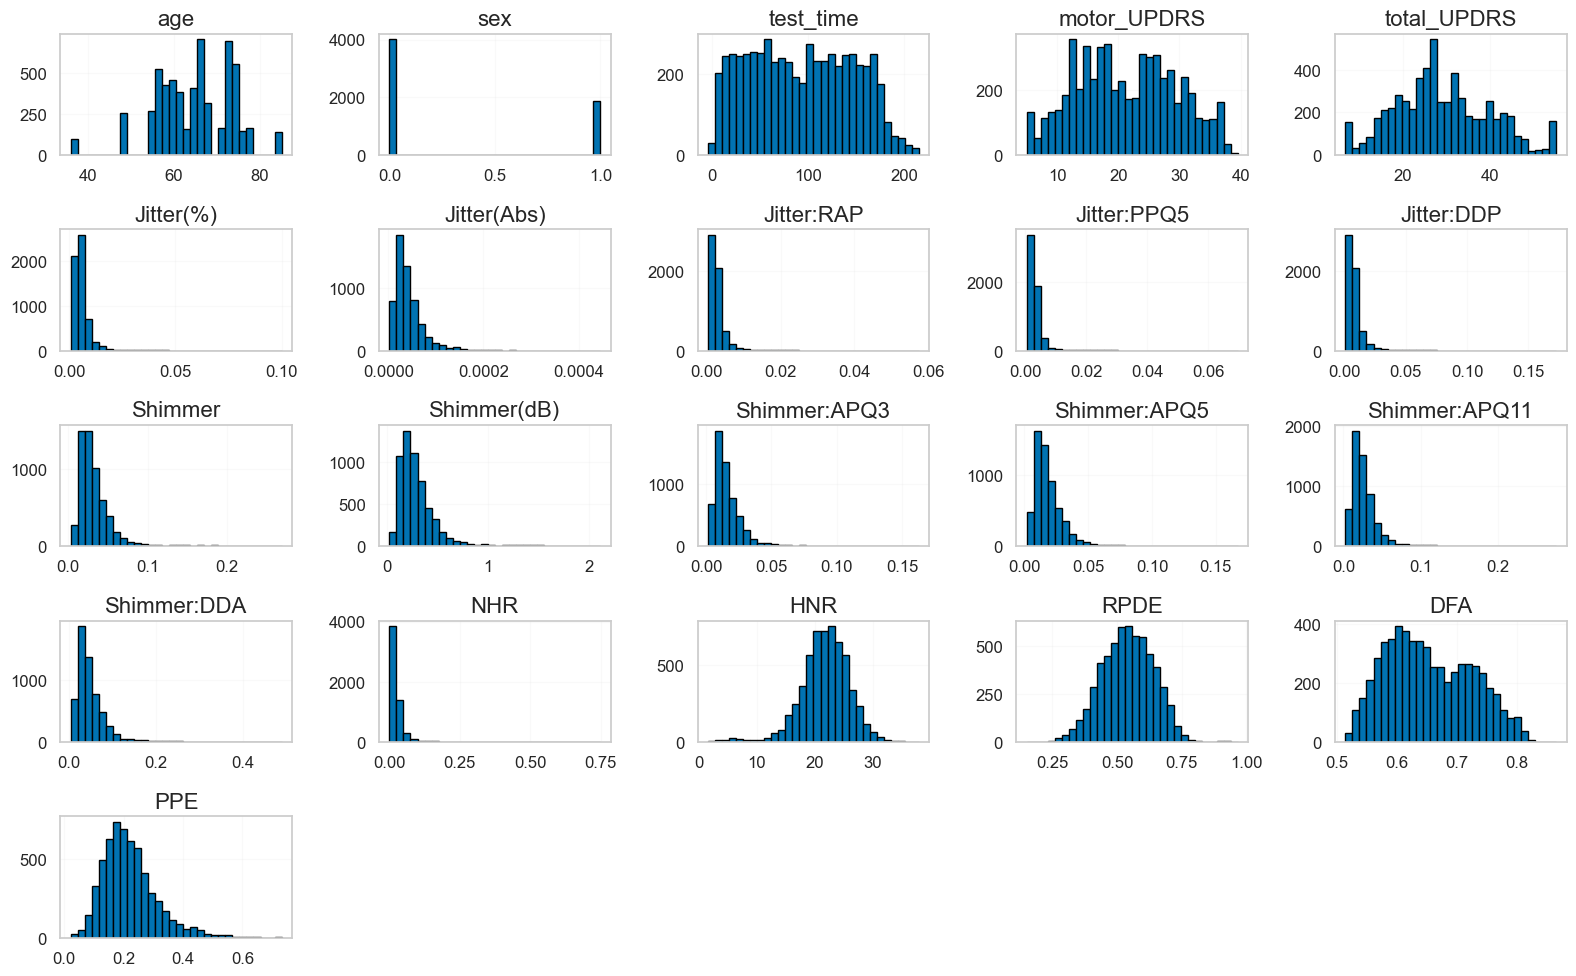

In [25]:
# Setting style
sns.set_style("whitegrid")

# Histogram for numerical features
df.iloc[:,1:].hist(figsize=(16, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

### **4. Distribution of Response**

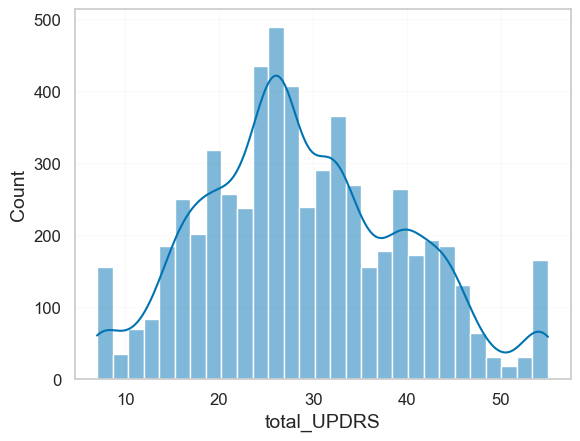

In [27]:
sns.histplot(df['total_UPDRS'], kde = True)
plt.show()

### **5. Box Plots**

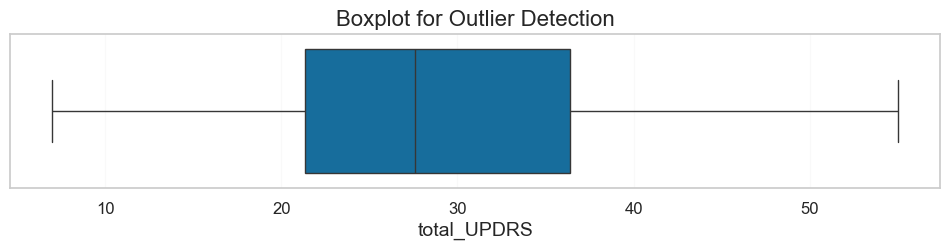

In [29]:
plt.figure(figsize=(12,2))
sns.boxplot(x=df['total_UPDRS'])
plt.xticks()
plt.title("Boxplot for Outlier Detection")
plt.show()

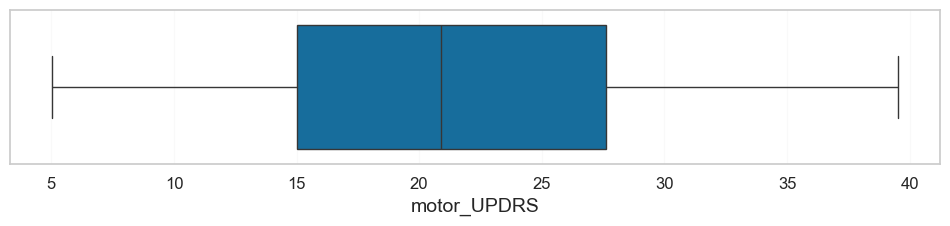

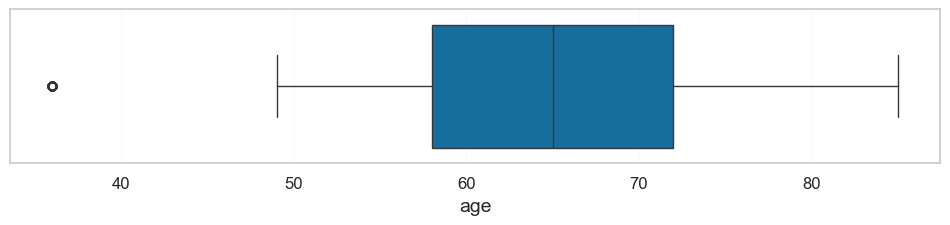

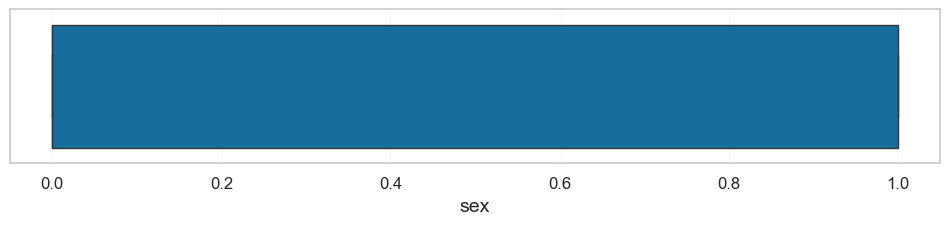

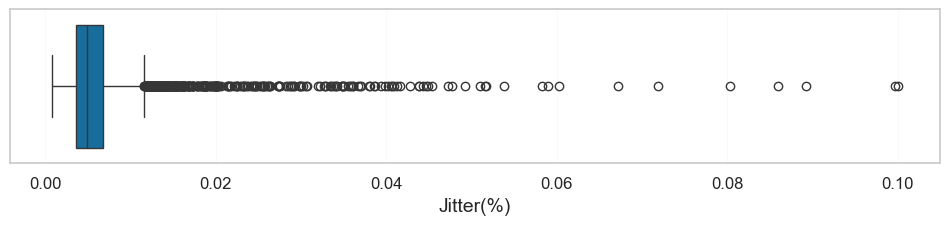

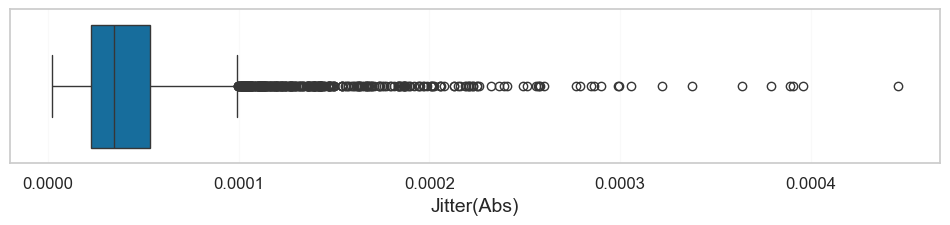

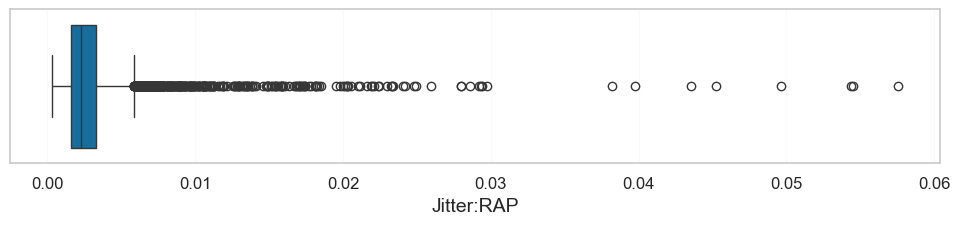

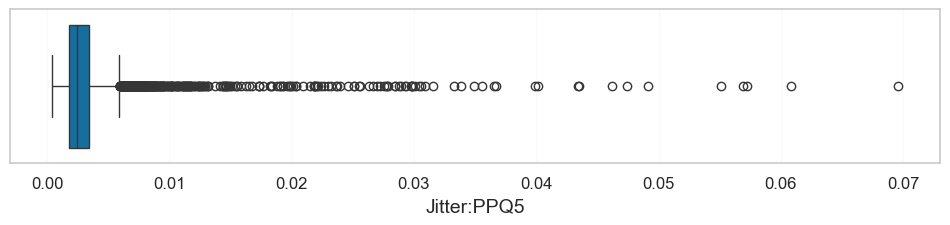

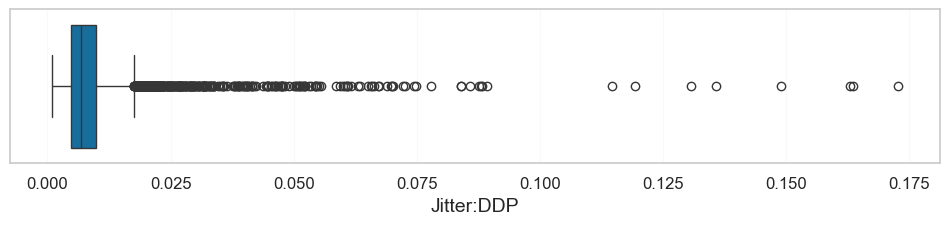

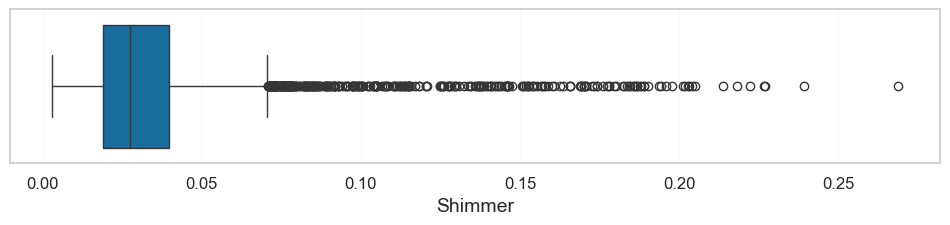

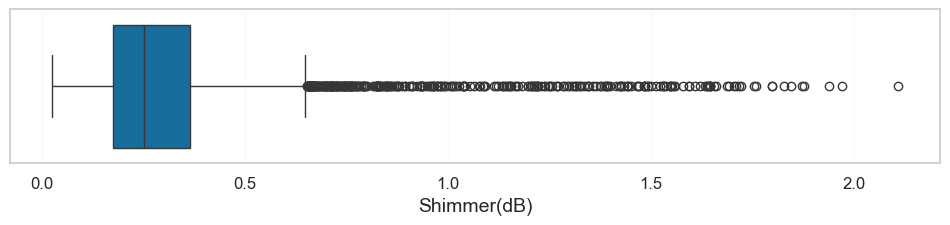

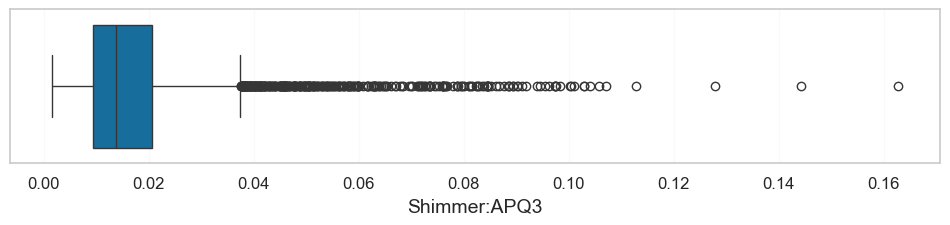

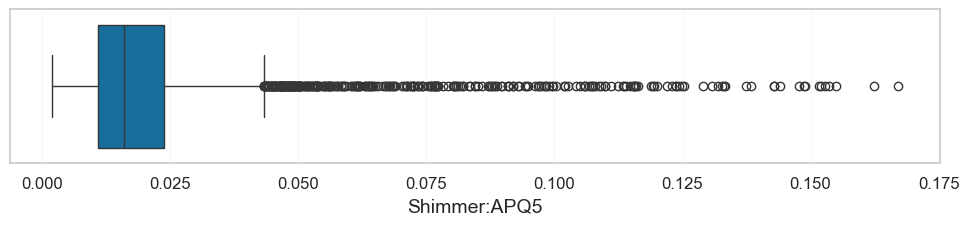

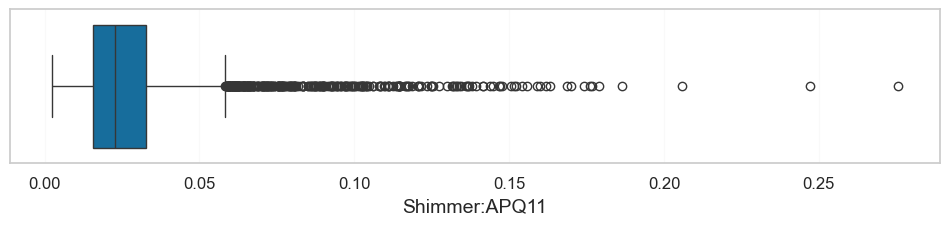

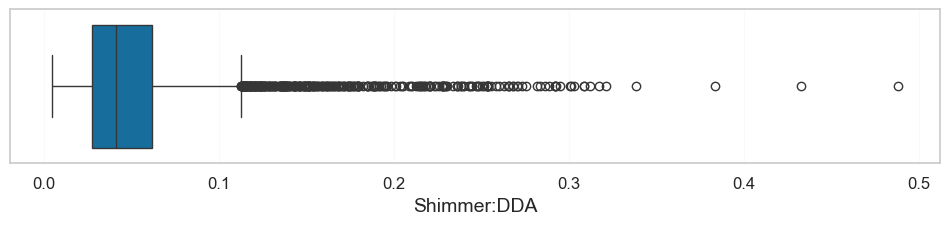

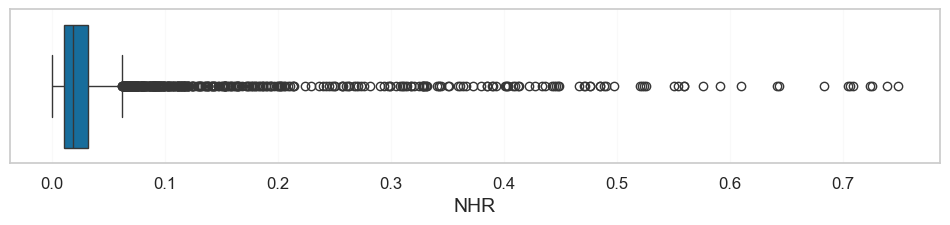

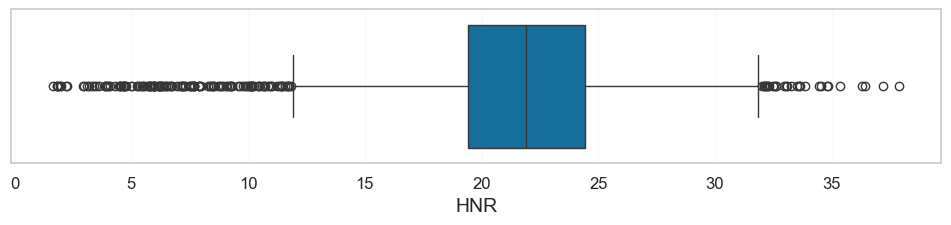

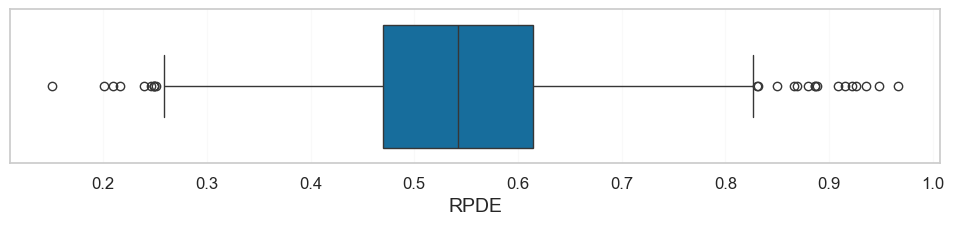

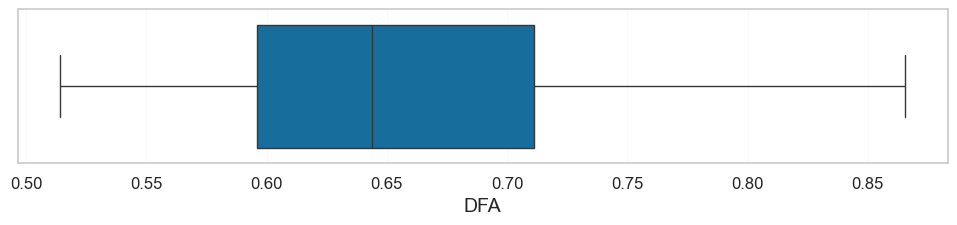

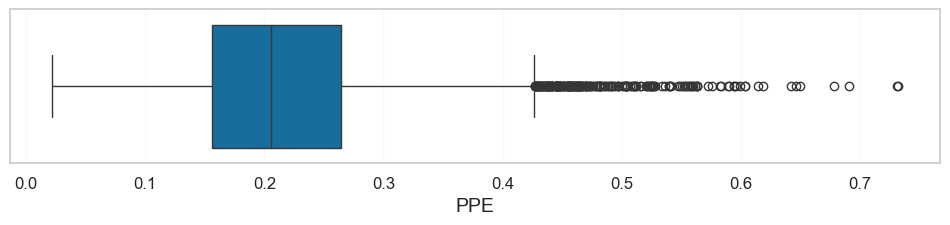

In [30]:
columns = ['motor_UPDRS', 'age', 'sex','Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5',
           'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11',
           'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']
for column in columns:
  plt.figure(figsize=(12,2))
  sns.boxplot(x=df[column])
  plt.xticks()
  plt.show()

### **6. Pair Plots**

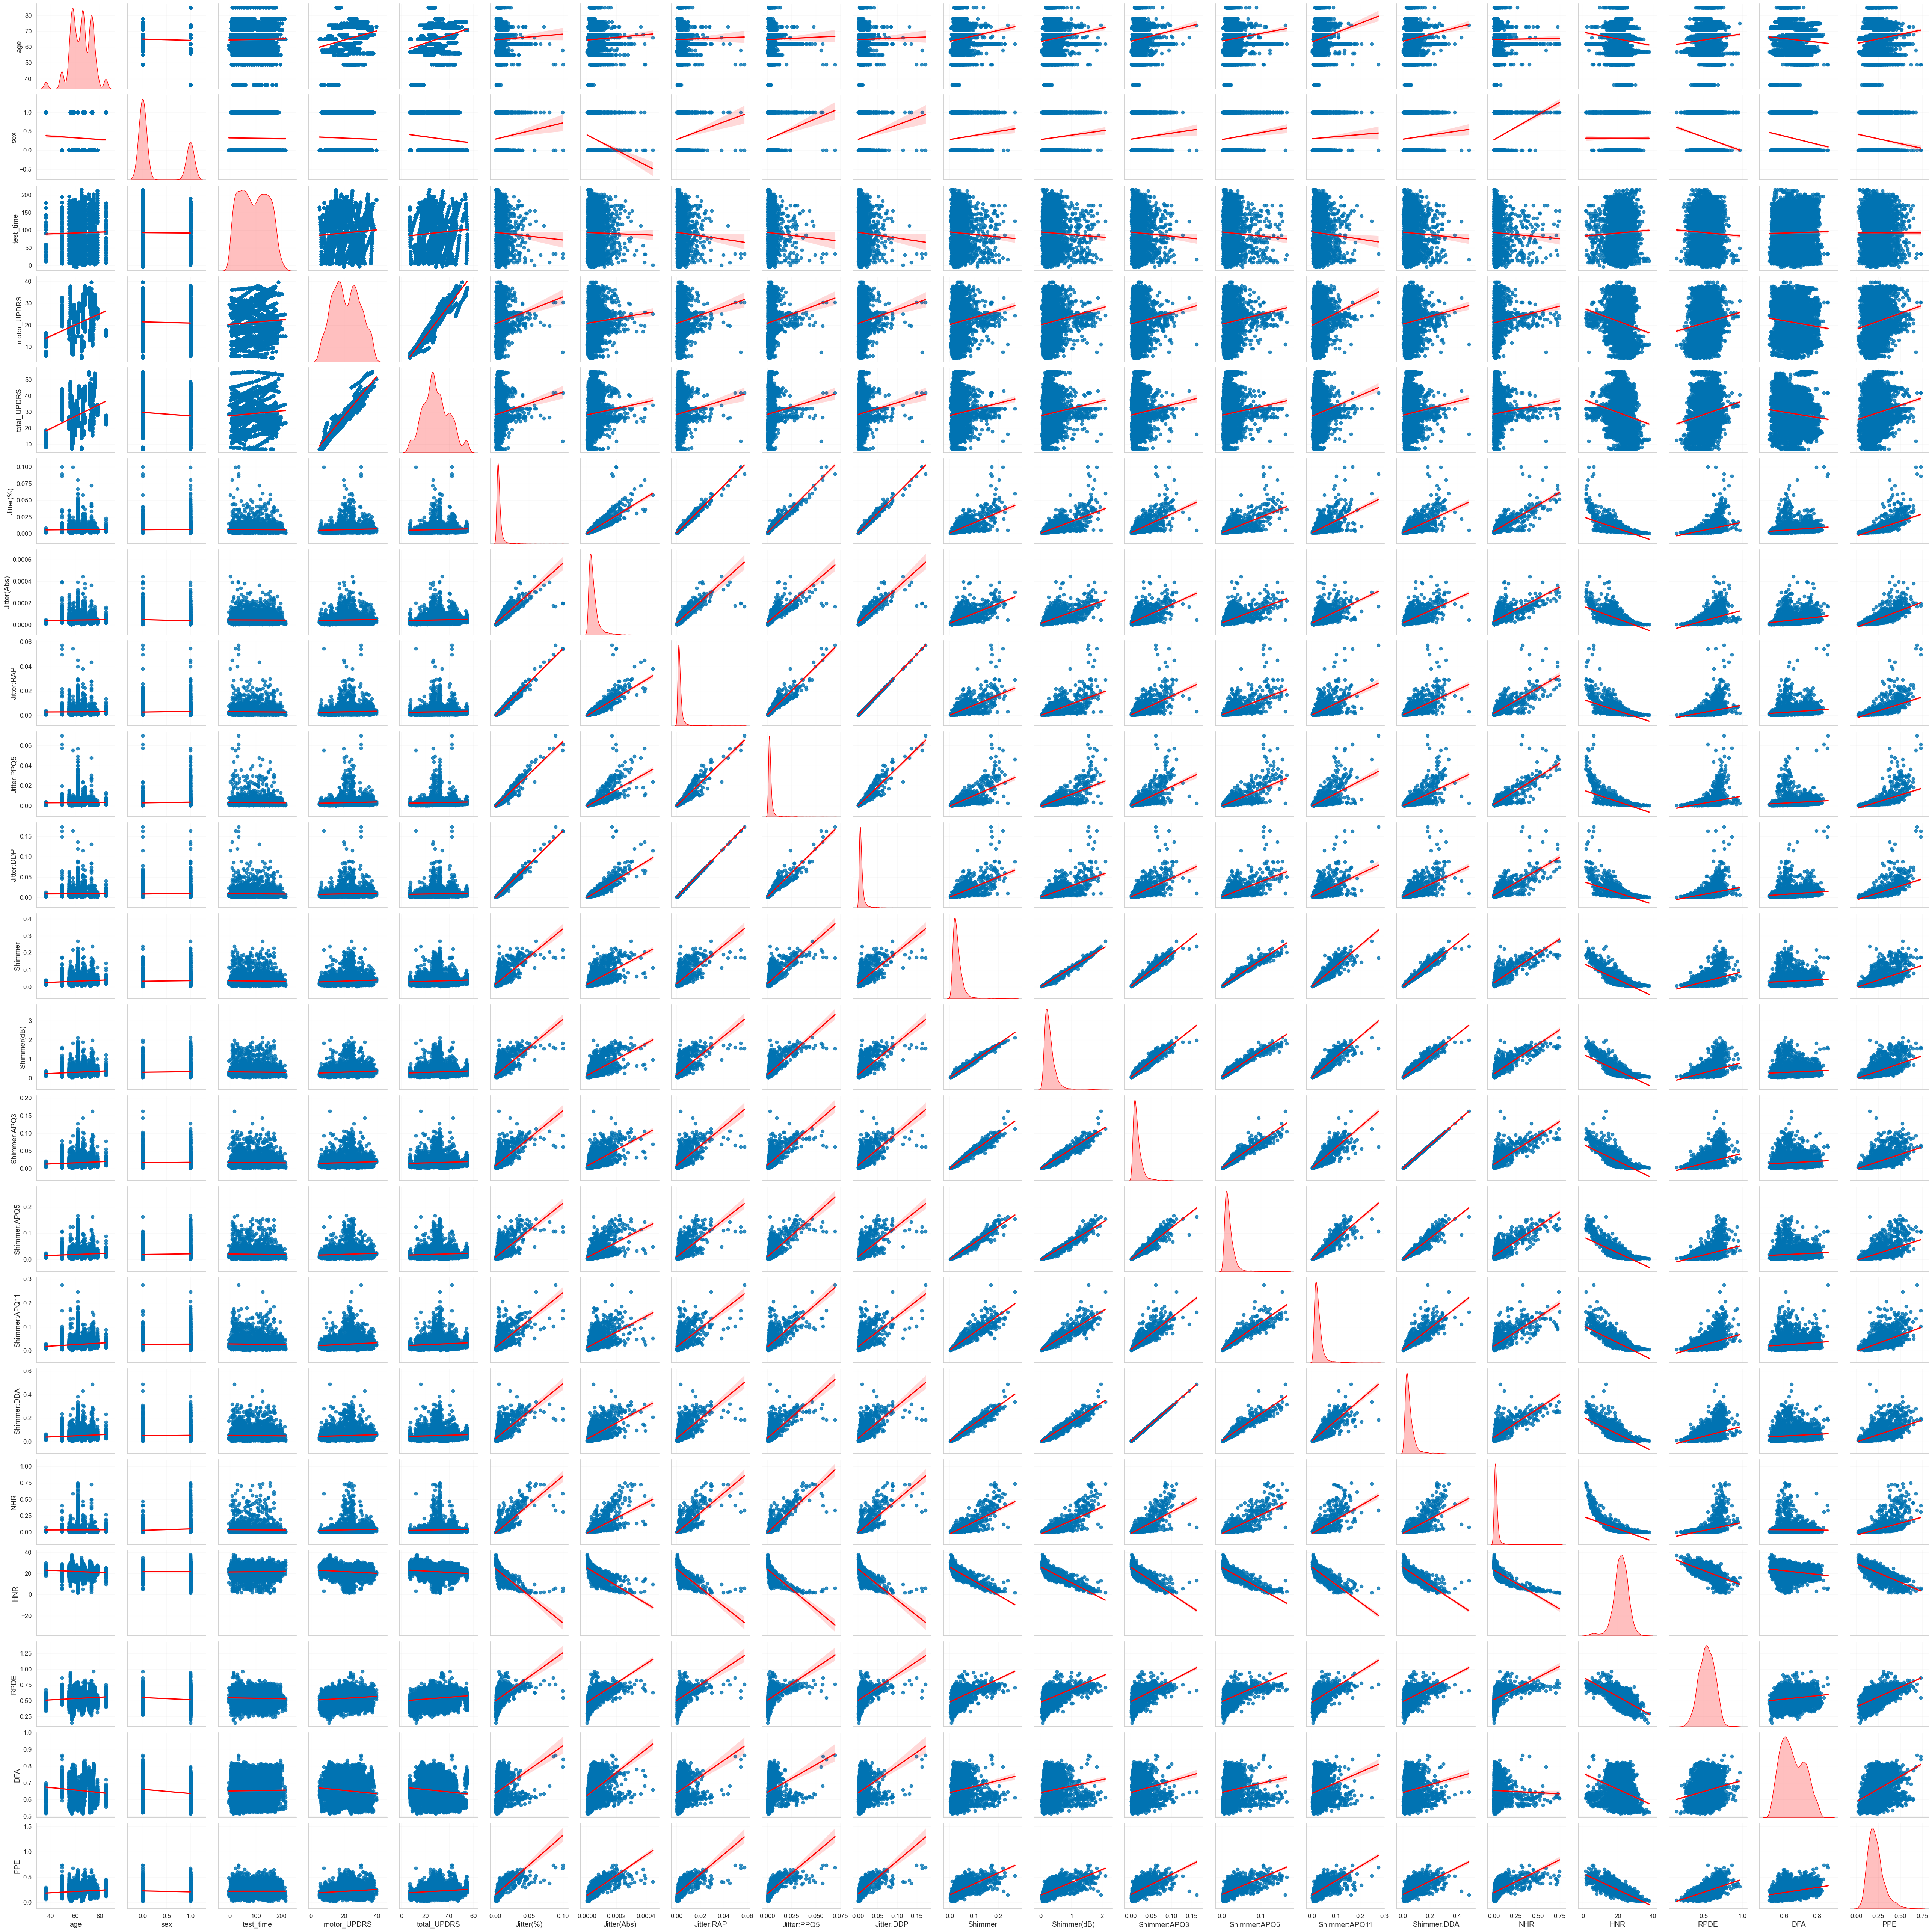

In [32]:
sns.pairplot(df.iloc[:,1:], kind = "reg", diag_kind = "kde", diag_kws={"color":"red"}, plot_kws={"line_kws":{"color":"red"}})
plt.show()

# **C. Preprocessing**

### **1. Extracting the Predictors**

In [35]:
X = df.drop(columns=['subject#', 'test_time', 'motor_UPDRS', 'total_UPDRS'])

### **2. Feature Scaling**

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [38]:
# Scaling the features and converting to a DF
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [39]:
# Correlation of each predictor to response
corr_matrix = X_scaled.corrwith(df['total_UPDRS'])
print(round(corr_matrix,3))

age              0.310
sex             -0.097
Jitter(%)        0.074
Jitter(Abs)      0.067
Jitter:RAP       0.064
Jitter:PPQ5      0.063
Jitter:DDP       0.064
Shimmer          0.092
Shimmer(dB)      0.099
Shimmer:APQ3     0.079
Shimmer:APQ5     0.083
Shimmer:APQ11    0.121
Shimmer:DDA      0.079
NHR              0.061
HNR             -0.162
RPDE             0.157
DFA             -0.113
PPE              0.156
dtype: float64


# **D. Identifying Multicollinearity**
- Multicollinearity requires the data to be scaled which we have done and stored the scaled values in `X_scaled`.

### **1. Covariance (R) Matrix Approach**

In [42]:
R = X_scaled.cov()
R

age       sex  Jitter(%)  Jitter(Abs)  Jitter:RAP  \
age            1.000170 -0.041609   0.023075     0.035697    0.010257   
sex           -0.041609  1.000170   0.051430    -0.154672    0.076731   
Jitter(%)      0.023075  0.051430   1.000170     0.865725    0.984348   
Jitter(Abs)    0.035697 -0.154672   0.865725     1.000170    0.844770   
Jitter:RAP     0.010257  0.076731   0.984348     0.844770    1.000170   
Jitter:PPQ5    0.013202  0.088010   0.968379     0.790672    0.947357   
Jitter:DDP     0.010260  0.076716   0.984351     0.844774    1.000170   
Shimmer        0.101571  0.058746   0.709912     0.649157    0.681845   
Shimmer(dB)    0.111149  0.056490   0.716826     0.655982    0.685667   
Shimmer:APQ3   0.098929  0.044945   0.664262     0.623936    0.650337   
Shimmer:APQ5   0.089998  0.064830   0.694120     0.621507    0.659944   
Shimmer:APQ11  0.135261  0.023364   0.646075     0.590099    0.603184   
Shimmer:DDA    0.098930  0.044945   0.664261     0.623934    0.650335   
NHR            0.007094  0.168198   0.825434     0.700079    0.792508   
HNR           -0.104860 -0.000167  -0.675303    -0.706538   -0.641582   
RPDE           0.090224 -0.159290   0.427200     0.547193    0.382956   
DFA           -0.092886 -0.165142   0.226589     0.352324    0.214918   
PPE            0.120810 -0.099918   0.721972     0.787987    0.670766   

               Jitter:PPQ5  Jitter:DDP   Shimmer  Shimmer(dB)  Shimmer:APQ3  \
age               0.013202    0.010260  0.101571     0.111149      0.098929   
sex               0.088010    0.076716  0.058746     0.056490      0.044945   
Jitter(%)         0.968379    0.984351  0.709912     0.716826      0.664262   
Jitter(Abs)       0.790672    0.844774  0.649157     0.655982      0.623936   
Jitter:RAP        0.947357    1.000170  0.681845     0.685667      0.650337   
Jitter:PPQ5       1.000170    0.947364  0.732872     0.734716      0.676827   
Jitter:DDP        0.947364    1.000170  0.681850     0.685673      0.650339   
Shimmer           0.732872    0.681850  1.000170     0.992503      0.979995   
Shimmer(dB)       0.734716    0.685673  0.992503     1.000170      0.968180   
Shimmer:APQ3      0.676827    0.650339  0.979995     0.968180      1.000170   
Shimmer:APQ5      0.734146    0.659946  0.985072     0.976539      0.962887   
Shimmer:APQ11     0.668527    0.603193  0.935616     0.936498      0.885846   
Shimmer:DDA       0.676825    0.650337  0.979994     0.968179      1.000170   
NHR               0.865011    0.792512  0.795294     0.798213      0.732861   
HNR              -0.662522   -0.641591 -0.801552    -0.802633     -0.780830   
RPDE              0.381568    0.382951  0.468314     0.472489      0.436952   
DFA               0.175388    0.214930  0.132563     0.126133      0.130757   
PPE               0.663604    0.670775  0.615813     0.635271      0.576802   

               Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR       HNR  \
age                0.089998       0.135261     0.098930  0.007094 -0.104860   
sex                0.064830       0.023364     0.044945  0.168198 -0.000167   
Jitter(%)          0.694120       0.646075     0.664261  0.825434 -0.675303   
Jitter(Abs)        0.621507       0.590099     0.623934  0.700079 -0.706538   
Jitter:RAP         0.659944       0.603184     0.650335  0.792508 -0.641582   
Jitter:PPQ5        0.734146       0.668527     0.676825  0.865011 -0.662522   
Jitter:DDP         0.659946       0.603193     0.650337  0.792512 -0.641591   
Shimmer            0.985072       0.935616     0.979994  0.795294 -0.801552   
Shimmer(dB)        0.976539       0.936498     0.968179  0.798213 -0.802633   
Shimmer:APQ3       0.962887       0.885846     1.000170  0.732861 -0.780830   
Shimmer:APQ5       1.000170       0.939095     0.962887  0.798309 -0.790773   
Shimmer:APQ11      0.939095       1.000170     0.885845  0.711667 -0.778107   
Shimmer:DDA        0.962887       0.885845     1.000170  0.732859 -0.780829   
NHR                0.798

In [43]:
# Determinant of R matrix
np.linalg.det(R)

9.083602965953576e-27

##### **INSIGHTS:**
* Determinant of the Covariance matrix is almost `0`. Thus, this approach suggests presence of Multicollinearity among the predictor variables.

### **2. Correlation Matrix (HeatMap)**

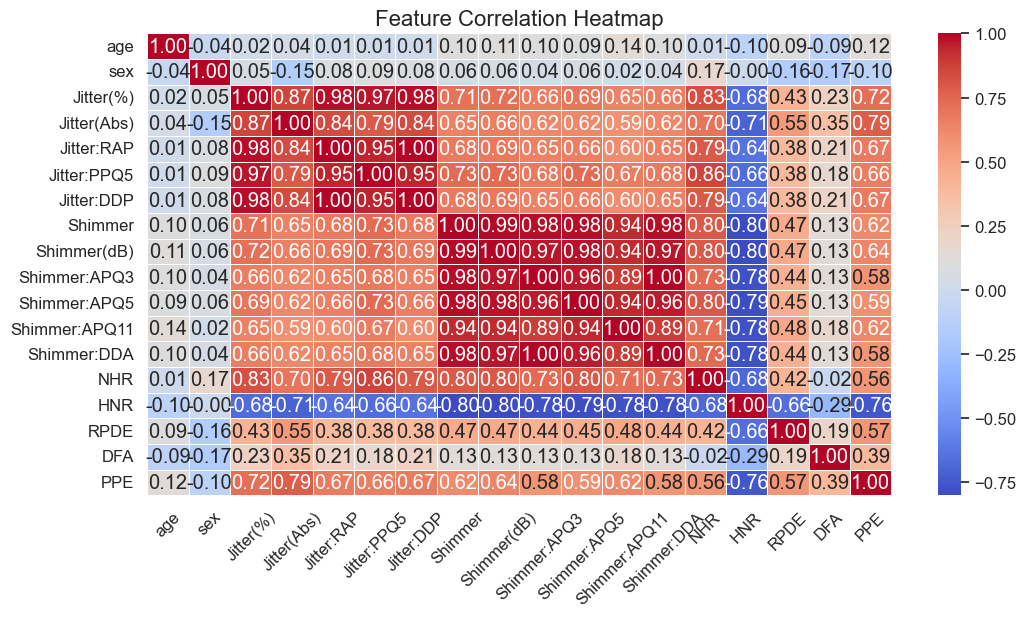

In [46]:
plt.figure(figsize=(12, 6))
sns.heatmap(X_scaled.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.xticks(rotation=45)
plt.show()

##### **INSIGHTS:**
* Observing non-diagonal values of this matrix suggests high multicollinearity among the predictor variables.

### **3. Variance Inflation factor (VIF)**
- VIF can be defined as
  * the ith diagonal entry of the inverse of R matrix
  * 1/(1-Ri2), where Ri2 is the R-squared from regressing Xi on all other features.

In [49]:
# Statistical Library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
vif = []

for i in range(X_scaled.shape[1]):
  vif.append(variance_inflation_factor(X_scaled, i))

In [51]:
VIF = pd.DataFrame({'VIF': vif}, index=X.columns).T
VIF

age       sex  Jitter(%)  Jitter(Abs)    Jitter:RAP  Jitter:PPQ5  \
VIF  1.095812  1.348618   88.98957     7.852089  1.323850e+06    30.996447   

       Jitter:DDP     Shimmer  Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  \
VIF  1.324096e+06  173.374802    76.845312  2.398571e+07     52.525022   

     Shimmer:APQ11   Shimmer:DDA       NHR       HNR      RPDE       DFA  \
VIF      15.281674  2.398563e+07  8.583408  5.416978  2.099468  1.660175   

          PPE  
VIF  4.438268

##### **INSIGHTS:**
* A number of columns have `VIF > 10` which suggest serious multicollinearity.
* Columns responsible for multicollinearity are:
  1.   Jitter(%),
  2.   Jitter:RAP
  3.   Jitter:PPQ5
  4.   Jitter:DDP
  5.   Shimmer
  6.   Shimmer(dB)
  7.   Shimmer:APQ3
  8.   Shimmer:APQ5
  9.   Shimmer:APQ11
  10.  Shimmer:DDA

### **4. Condition Numbers (CN)**
* Usual threshold for cond_numb and cond_ind are 50 or 100.
* Check whether we can directly compute these values using np or pd.

In [54]:
# Obtain eiguen_values of R matrix
eig_val_R, eig_vec_R = np.linalg.eig(R)
eig_val_R

array([1.12705987e+01, 1.72492984e+00, 1.47157206e+00, 1.00629087e+00,
       7.97643838e-01, 7.19378123e-01, 2.97227861e-01, 2.06754028e-01,
       1.68791717e-01, 1.52610251e-01, 9.90647753e-02, 4.09307354e-02,
       2.02357619e-02, 1.39107936e-02, 8.66601147e-03, 4.45854128e-03,
       2.08491240e-08, 3.77789552e-07])

In [55]:
CN = eig_val_R.max()/eig_val_R.min()
print(f"Condition Number: {CN}")

Condition Number: 540579008.0560971


##### **INSIGHTS:**
* This condition number is so large, even an illerate man can say that there is multicollinearity.

### **5. Condition Indices**

In [58]:
cond_ind = eig_val_R.max()/eig_val_R
cond_ind

array([1.00000000e+00, 6.53394619e+00, 7.65888336e+00, 1.12001401e+01,
       1.41298637e+01, 1.56671414e+01, 3.79190521e+01, 5.45121120e+01,
       6.67722266e+01, 7.38521737e+01, 1.13769993e+02, 2.75357837e+02,
       5.56964388e+02, 8.10205302e+02, 1.30055202e+03, 2.52786686e+03,
       5.40579008e+08, 2.98330081e+07])

##### **INSIGHTS:**
* Considering 100 to be the cutoff for multicollinearity.
* This approach suggests that **last 8 principal components** are responsible for Multicollinearity.
* It does not say that the last 8 predictors are responsible for multicollinearity.

### **6. Measure based on variance decomposition**

In [61]:
# Make a matrix of the eigen vectors of R in decreasing order of the eigen values
eig_vec_R_sorted = eig_vec_R[:, eig_val_R.argsort()[::-1]]
eig_vec_R_sorted

array([[ 2.54310977e-02, -1.75790033e-01,  2.02090921e-01,
         8.66539792e-01, -3.09412717e-01,  2.40186004e-01,
        -1.27860704e-01,  3.55106214e-02, -5.95361161e-02,
        -3.75564522e-02, -2.52404110e-02, -8.45041013e-04,
        -7.03789426e-03, -6.31670254e-03, -1.00120737e-03,
         9.99533712e-04,  5.02993687e-07,  8.79304090e-07],
       [ 9.69797872e-03, -1.98657107e-01, -5.42110290e-01,
        -7.13347248e-02, -7.16757845e-01, -3.27740865e-01,
         1.36528252e-02, -1.27634637e-01,  4.71210672e-02,
        -1.12103436e-01,  7.27191936e-02,  6.03046687e-02,
         3.83244729e-03,  9.99299191e-03,  1.33588589e-03,
        -2.75105890e-03, -1.20509402e-05, -2.99146252e-07],
       [ 2.66479112e-01,  2.62505046e-01, -1.94930031e-01,
         9.65658115e-02,  3.92932247e-02,  5.44447396e-02,
        -5.85007676e-02,  1.84556938e-04,  1.20381572e-01,
         1.09222101e-01,  3.03575689e-03,  3.69455495e-02,
         1.45204594e-01,  1.78484015e-02,  8.67280345e

In [62]:
# create a diagonal matrix of eigen values sorted in descending order and find its inverse
eig_val_R_sorted = np.diag(np.sort(eig_val_R)[::-1])
eig_val_R_sorted_inv = np.linalg.inv(eig_val_R_sorted)

In [63]:
# matrix multiplication
P = (eig_vec_R_sorted.T.dot(eig_val_R_sorted_inv)).dot(eig_vec_R_sorted)

In [64]:
P = P.T/(vif)

In [65]:
pd.DataFrame(P.T)

0             1             2              3             4   \
0   2.326203e+06  2.401756e+06  2.238386e+06  741832.608973 -1.858750e+06   
1   1.951533e+06  2.179114e+06  2.055983e+06  396319.623115 -1.840757e+06   
2   2.756334e+04  3.115798e+04  2.945169e+04    5073.485865 -2.665090e+04   
3   1.035277e+05  6.806899e+04  5.749900e+04   86472.694028 -1.618305e+04   
4  -1.538573e+00 -1.875195e+00 -1.791481e+00      -0.095986  1.720688e+00   
5  -4.170123e+04 -3.359814e+04 -2.986723e+04  -26321.130377  1.711105e+04   
6   6.345143e+00  6.237335e+00  5.764962e+00       2.455823 -4.532003e+00   
7   1.950741e+03  2.739682e+03  2.664232e+03    -377.005800 -2.802355e+03   
8   4.125629e+04  4.109263e+04  3.806706e+04   15228.499970 -3.038766e+04   
9  -3.336292e-02 -3.681170e-02 -3.466841e-02      -0.007384  3.071106e-02   
10 -6.786849e+04 -7.030177e+04 -6.555405e+04  -21329.639164  5.462160e+04   
11 -4.622386e+04 -4.987283e+04 -4.680816e+04  -11783.995347  4.061577e+04   
12 -3.769690e-02 -3.786722e-02 -3.512995e-02      -0.013473  2.831496e-02   
13 -2.347772e+04 -2.328541e+04 -2.155460e+04   -8804.125575  1.712171e+04   
14 -9.764916e+04 -9.852041e+04 -9.146578e+04  -34310.760606  7.408183e+04   
15  6.194095e+04  5.971258e+04  5.500003e+04   25596.575415 -4.222300e+04   
16 -3.379400e+01 -3.024519e+01 -2.706298e+01     -17.132069  1.885773e+01   
17 -8.407900e+00 -4.714775e+00 -6.457766e+00      -1.710224  4.645596e+00   

              5             6              7             8              9   \
0  -1.179573e+06  7.666987e+06  308638.114763  2.893154e+06 -730265.342281   
1  -7.722150e+05  6.123919e+06  352206.346372  2.341490e+06 -654710.923215   
2  -1.040322e+04  8.577815e+04    5190.616933  3.287211e+04   -9344.314049   
3  -1.039037e+05  4.141247e+05   -8324.320158  1.490353e+05  -22556.664351   
4   4.006357e-01 -4.532843e+00      -0.367004 -1.763907e+00       0.556427   
5   3.367182e+04 -1.551992e+05    -158.678686 -5.680332e+04   10668.417243   
6  -3.633139e+00  2.150302e+01       0.663453  8.055665e+00      -1.911531   
7  -2.836903e+01  5.066912e+03     671.320936  2.047163e+03    -798.329634   
8  -2.291228e+04  1.388044e+05    4618.713037  5.209902e+04  -12566.934731   
9   1.378667e-02 -1.055232e-01      -0.005771 -4.026189e-02       0.011082   
10  3.411252e+04 -2.232632e+05   -9134.155707 -8.429196e+04   21365.227284   
11  2.059517e+04 -1.483181e+05   -7354.060497 -5.636828e+04   15062.068193   
12  2.051074e-02 -1.262262e-01      -0.004403 -4.743550e-02       0.011565   
13  1.317145e+04 -7.917926e+04   -2571.760032 -2.970031e+04    7125.467563   
14  5.256372e+04 -3.261709e+05  -11647.886306 -1.226533e+05   30066.188402   
15 -3.702733e+04  2.121280e+05    5807.595675  7.925570e+04  -18358.295983   
16  2.304010e+01 -1.191167e+02      -1.636541 -4.419871e+01       9.163719   
17  2.824131e+00 -2.179196e+01       1.591884 -7.759127e+00       2.210635   

              10             11             12             13             14  \
0  -3.253108e+06 -644616.147737 -825127.024973 -183899.093550 -482713.651679   
1  -2.738064e+06 -565126.884398 -673481.412600 -148202.220520 -395725.785253   
2  -3.869249e+04   -8038.099686   -9468.683568   -2079.029518   -5567.709956   
3  -1.426805e+05  -22933.918831  -41156.153984   -9624.113531  -23670.214077   
4   2.167164e+00       0.468842       0.513013       0.111012       0.303131   
5   5.780536e+04   10153.703951   15871.594808    3647.383333    9186.102579   
6  -8.856540e+00      -1.711771      -2.286554      -0.513277      -1.334391   
7  -2.767252e+03    -648.204682    -609.084530    -127.322222    -363.930303   
8  -5.761493e+04  -11209.554868  -14805.984700   -3317.442596   -8646.071309   
9   4.678656e-02       0.009596       0.011565       0.002550       0.006790   
10  9.492524e+04   18840.999119   24047.725207    5357.094382   14070.801113   
11  6.475887e+04   13128.175118   16150.922112    3574.387446    9471.070335   
12  5.266100e-02       0.01

# **E. Multicollinearity handling**

### **1. Dimensionality reduction using PCA**

# **F. Base Regression Model**

### **1. Using sikit learn's LinearRegression()**
- It is suggested to do train_test_split before scaling so we will first apply `train_test_split` and then scale them.

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['total_UPDRS'], test_size=0.2, random_state=42)

In [72]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
base_lr =  LinearRegression()
base_lr.fit(X_train_scaled, y_train)
y_pred = base_lr.predict(X_test_scaled)

In [74]:
# r2 score and mse
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

R2 Score: 0.15069834990397446
MSE: 94.11370054462346


##### **INSIGHTS:**
* The coefficient of determination has turned out to be too little.

### **2. Using statsmodels OLS**
- While using OLS, there is no need for `train_test_split` so we will use `X_scaled` in this section.

In [77]:
import statsmodels.api as sm

In [78]:
# Creating the Y
Y = df['total_UPDRS']

# Add constant for intercept
X = sm.add_constant(X_scaled)

# Fit model
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            total_UPDRS   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     66.53
Date:                Thu, 29 May 2025   Prob (F-statistic):          2.37e-220
Time:                        17:46:16   Log-Likelihood:                -21715.
No. Observations:                5875   AIC:                         4.347e+04
Df Residuals:                    5856   BIC:                         4.359e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            29.0189      0.127    227.786

##### **MODEL PERFORMANCE:**
* **R-squared = 0.170, Adj. R-squared = 0.167**
  - The model explains only `17%` of the variability in the target variable. Not very strong — there's a lot of variation unaccounted for.

* **F-statistic = 66.53, Prob (F-statistic) = 2.37e-220**
  - Statistically significant overall — at least one predictor is meaningfully associated with the outcome.

* **Satistically significant predictors at `5%` level of significance**:
  1. `age`: Positive association — as age increases, total_UPDRS increases.
  2. `sex`: Suggests a gender-based difference in total_UPDRS.
  3. `Jitter(Abs)`: Both show significant positive correlation with response.
  4. `Shimmer`
  5. `Shimmer:APQ11`
  6. `NHR`, `HNR`: Highly significant.
  7. `RPDE`, `DFA`, `PPE`
  * These variables are likely to contain meaningful signal related to the progression/severity of Parkinson's.

* **Durbin-Watson = 0.120**
  - Suggests positive autocorrelation of residuals.
  - Bad sign — could violate OLS assumptions.
* **Jarque-Bera test p-value (Prob(JB)) = 8.94e-33**
  - Residuals are not normally distributed.
* **Omnibus test p = 0.000**
  - Residuals are not normal.

# **G. Residual Analysis using OLS model**

In [81]:
from statsmodels.graphics.tsaplots import plot_acf

In [82]:
# residuals and fitted values
residuals = model.resid
fitted_vals = model.fittedvalues

### **1. Linearity and homoscedasticity check**

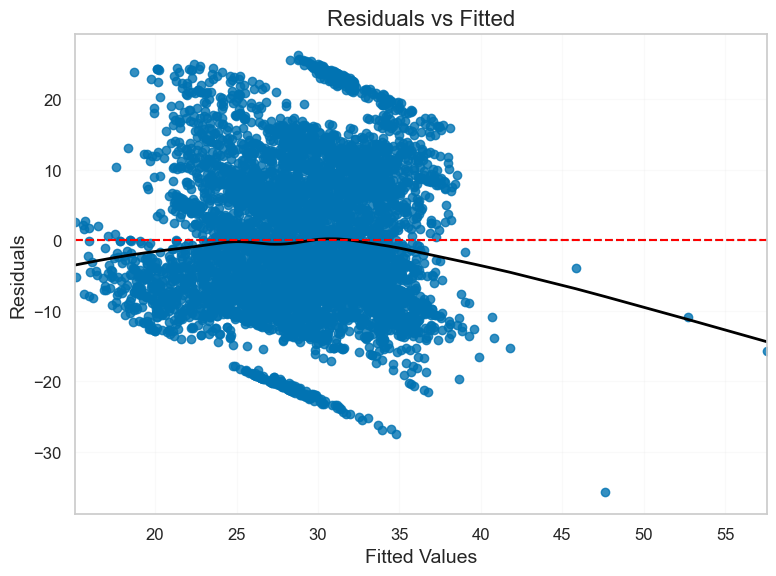

In [84]:
plt.figure(figsize=(8, 6))
sns.residplot(x=fitted_vals, y=residuals, lowess=True,
              line_kws={'color': 'black', 'lw': 2})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.axhline(0, color='red', linestyle='--')
plt.tight_layout()
plt.show()

##### **INSIGHTS:**
* Non-linearity detected
* The spread of residuals increases slightly as fitted values increase.
* Outliers and patterns:
  * There are visible horizontal lines of clustered residuals, likely due to repeated values or categorical effects.
  * A few strong outliers (far from 0) are present.

### **2. Normality of Residuals**

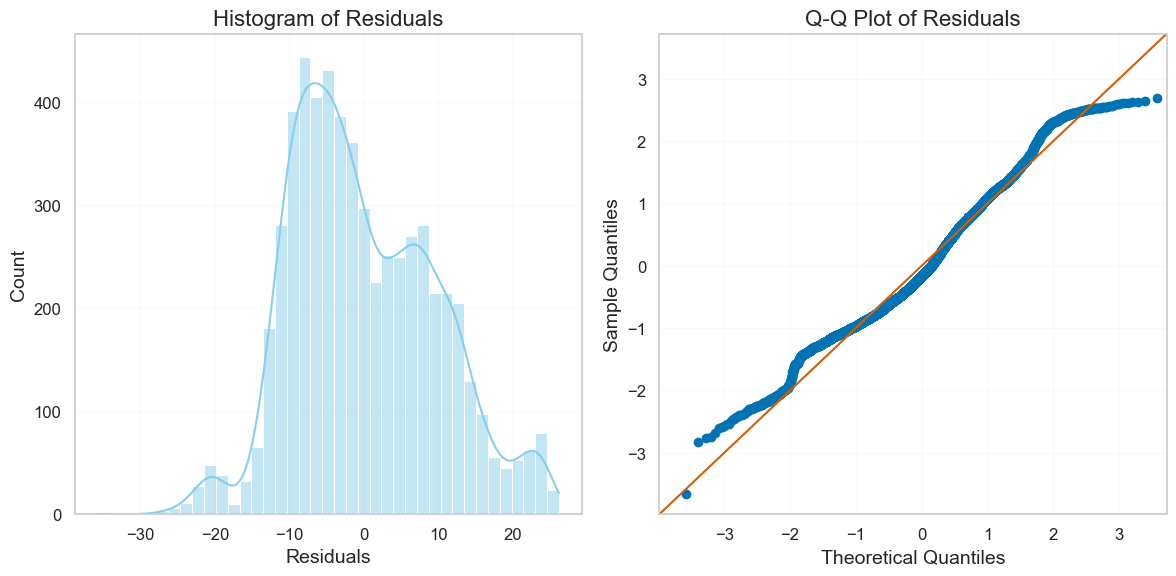

In [87]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(residuals, kde=True, color='skyblue', line_kws={'color': 'red'}, ax=ax1)
ax1.set_title("Histogram of Residuals")
ax1.set_xlabel("Residuals")

sm.qqplot(residuals, line='45', fit=True, ax=ax2)
ax2.set_title("Q-Q Plot of Residuals")

plt.tight_layout()
plt.show()

##### **INSIGHTS:**
* Residuals are approximately normal, but Deviations in the tails indicate violations of the normality assumption.

### **3. Autocorrelation of Residuals**

<Figure size 1200x400 with 0 Axes>

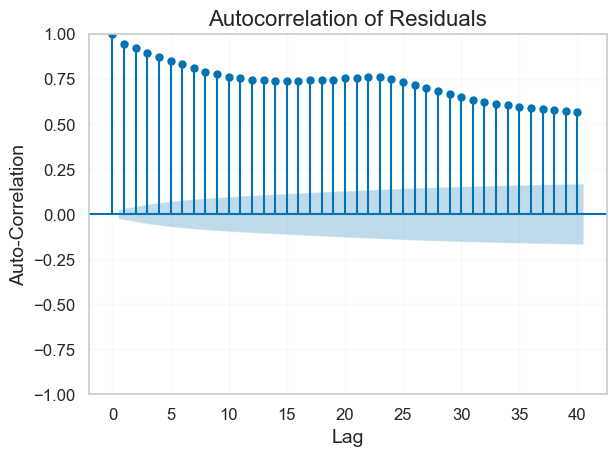

In [90]:
plt.figure(figsize=(12, 4))
plot_acf(residuals, lags=40)
plt.title('Autocorrelation of Residuals')
plt.xlabel('Lag')
plt.ylabel('Auto-Correlation')
plt.tight_layout()
plt.show()

##### **INSIGHTS:**
1. **Strong positive autocorrelation**:
  * The autocorrelation starts very close to 1 and decreases gradually.
  * Most lags up to lag 40 are well outside the confidence band (shaded area), meaning they are statistically significant.
2. **Violation of the independence assumption**:
  * Residuals are not independent, which is a major assumption of OLS.
  * This suggests there is time-dependence or sequence structure in your data that the model isn’t capturing.
3. **It is suggested to use tree-based models.**

# **H. Outlier Detection**

In [93]:
from statsmodels.stats.outliers_influence import OLSInfluence

In [94]:
# Get influence object
influence = OLSInfluence(model)

### **1. Cooks' Distance Method**

In [96]:
X_scaled.shape

(5875, 18)

Number of detected outliers:  145 - out of 5875


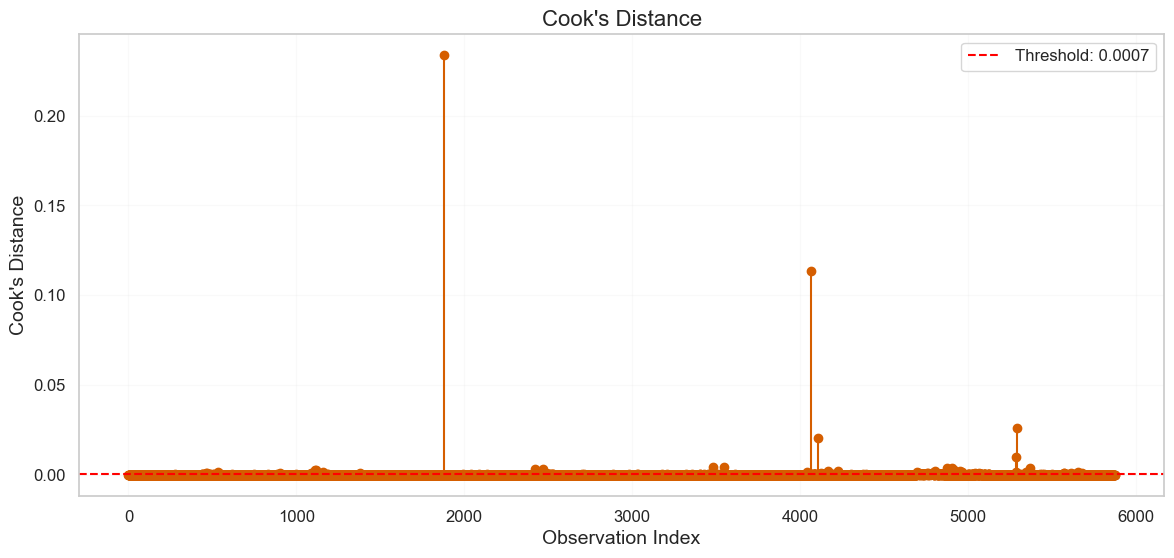

In [97]:
cooks_d = influence.cooks_distance[0]
threshold_cook = 4 / len(X)

influence_index_cook = np.where(cooks_d > threshold_cook)[0]
print('Number of detected outliers: ', len(influence_index_cook), '- out of 5875')

plt.figure(figsize=(14, 6))
plt.stem(np.arange(len(cooks_d)),cooks_d, markerfmt="ro", basefmt='r-', linefmt='r-')
plt.axhline(y=threshold_cook, color='red', linestyle='--', label=f'Threshold: {round(threshold_cook, 4)}')
plt.title("Cook's Distance")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.legend()
plt.show()

##### **INSIGHTS:**
1. **Threshold = 0.0007** using the formula for cutoff to be $(4/n)$ instead of taking 1 as threshold.
2. Most points lie well below this value, showing minimal influence
3. Notable **high-influence** spikes at indecies - 1900 (very prominent), 4100, 5300.

### **2. DFFITS Approach**

Number of detected outliers:  147 - out of 5875


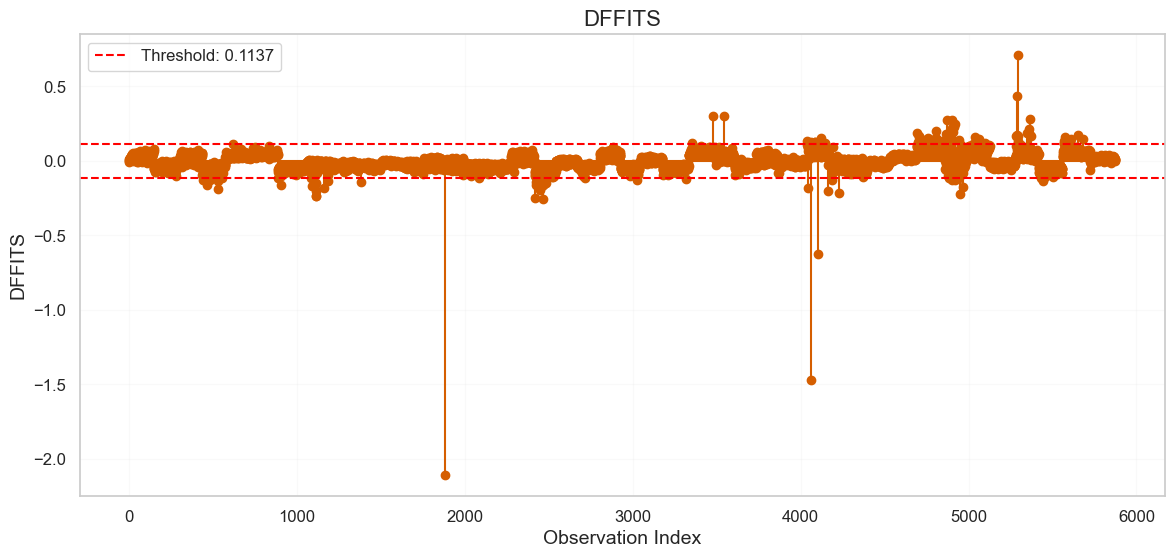

In [100]:
dffits = influence.dffits[0]
threshold_dffits = 2 * np.sqrt(X.shape[1] / len(X))

influence_index_dffits = np.where(np.abs(dffits) > threshold_dffits)[0]
print('Number of detected outliers: ', len(influence_index_dffits), '- out of 5875')

# dffits = dffits.apply(lambda x: threshold_dffits + 0.01 if x > threshold_dffits else x).apply(lambda x: -threshold_dffits - 0.01 if x < -threshold_dffits else x)

plt.figure(figsize=(14, 6))
plt.stem(dffits, markerfmt="ro", basefmt='r-', linefmt='r-')
plt.axhline(y=threshold_dffits, color='red', linestyle='--', label=f'Threshold: {round(threshold_dffits, 4)}')
plt.axhline(y=-threshold_dffits, color='red', linestyle='--')
plt.title("DFFITS")
plt.xlabel("Observation Index")
plt.ylabel("DFFITS")
plt.legend()
plt.show()

##### **INSIGHTS:**
1. **Threshold**: The dotted line at $±0.1137$ likely represents the conventional cutoff $2*\sqrt(p/n)$.
2. **Interpretation**: Points exceeding the threshold, both positively and negatively are potentially influential (spikes around indices $1900$, $4100$, $5300$).
3. The plot shows a relatively even spread of DFFITS values, with no clusters of high influence.

### **3. DFBETAs Approach**

Number of detected outliers:  1493 - out of 5875


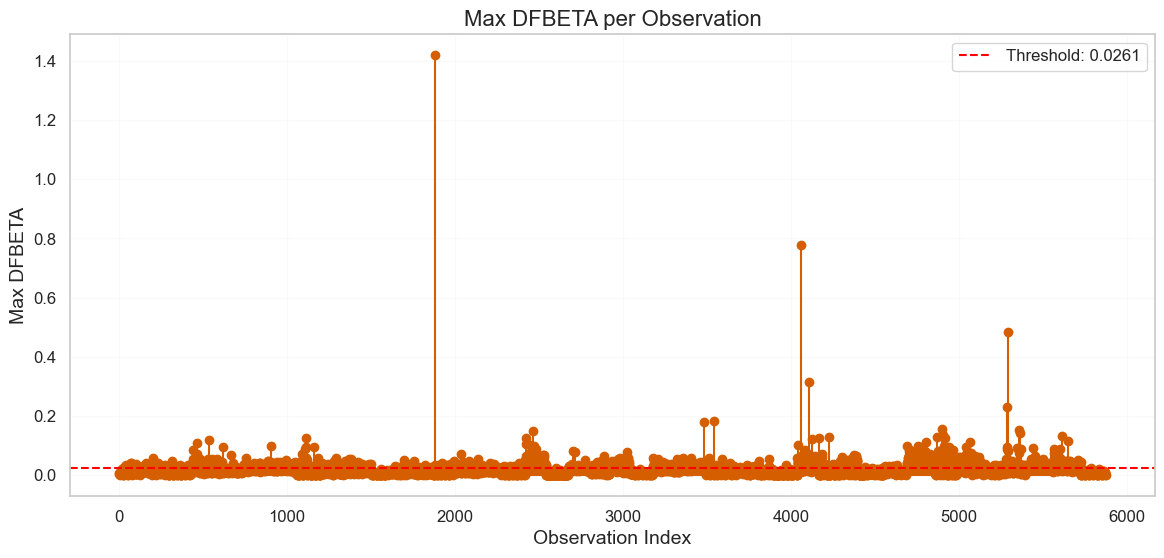

In [103]:
dfbetas = influence.dfbetas
threshold_dfbeta = 2 / np.sqrt(len(X))

# Optional: Check max DFBETA per obs
dfbeta_max = np.max(np.abs(dfbetas), axis=1)

# convert dfbetas to pandas series
dfbeta_max = pd.Series(dfbeta_max)

influence_index_dfbeta = np.where(dfbeta_max > threshold_dfbeta)[0]
print('Number of detected outliers: ', len(influence_index_dfbeta), '- out of 5875')

# dfbeta_max = dfbeta_max.apply(lambda x: threshold_dfbeta + 0.005 if x > threshold_dfbeta else x)

plt.figure(figsize=(14, 6))
plt.stem(dfbeta_max, markerfmt="ro", basefmt='r-', linefmt='r-')
plt.axhline(y=threshold_dfbeta, color='red', linestyle='--', label=f'Threshold: {round(threshold_dfbeta, 4)}')
plt.title("Max DFBETA per Observation")
plt.xlabel("Observation Index")
plt.ylabel("Max DFBETA")
plt.legend()
plt.show()

#### <u>**Insights**:</u>
1. **Threshold** used: $0.0261$
2. **DFBETA measures how much a predictor coefficient changes when an observation is removed**.
3. Majority of the data points are well below the threshold, indicating stability.
4. A few observations exceed the threshold, notably at indecies: $1900$ (very high, >1.4), $4100$, $5300$.
5. These suggest certain points have a strong effect on specific regression coefficients.

### **4. COVRATIO Approach**

Number of detected outliers:  528 - out of 5875


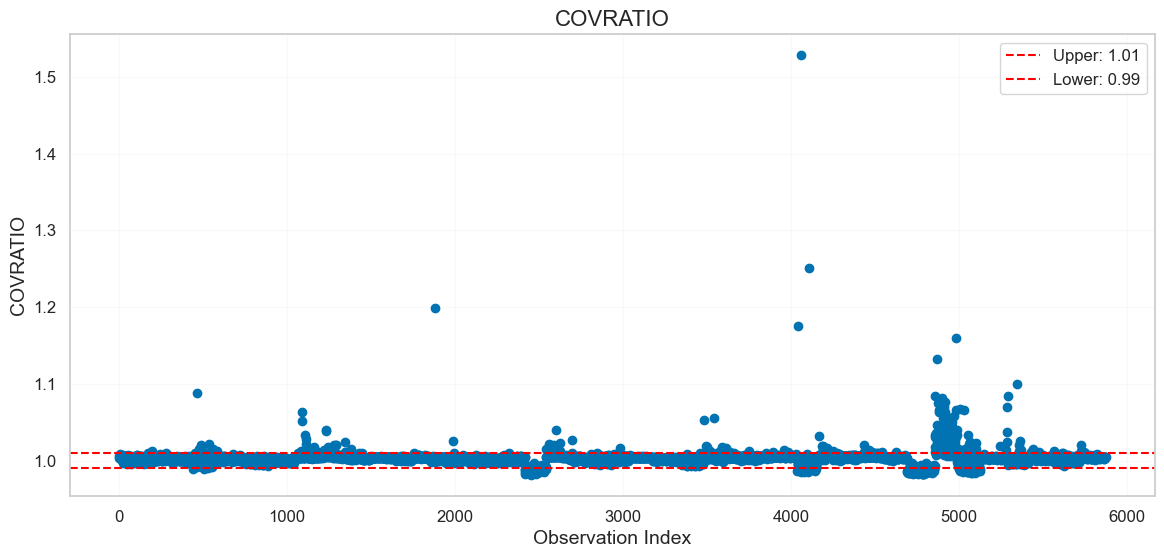

In [106]:
cov_ratio = influence.cov_ratio
p = X.shape[1]
n = X.shape[0]
upper = 1 + 3 * p / n
lower = 1 - 3 * p / n

# convert cov_ratio to pandas series
cov_ratio = pd.Series(cov_ratio)

influence_index_cov_upper = np.where(cov_ratio > upper)[0]
influence_index_cov_lower = np.where(cov_ratio < lower)[0]
print('Number of detected outliers: ', len(influence_index_cov_upper) + len(influence_index_cov_lower), '- out of 5875')

# cov_ratio = cov_ratio.apply(lambda x: upper + 0.001 if x > upper else x).apply(lambda x: lower - 0.001 if x < lower else x)


plt.figure(figsize=(14, 6))
plt.plot(cov_ratio, 'o')
plt.axhline(y=upper, color='red', linestyle='--', label=f'Upper: {round(upper, 3)}')
plt.axhline(y=lower, color='red', linestyle='--', label=f'Lower: {round(lower, 3)}')
plt.title("COVRATIO")
plt.xlabel("Observation Index")
plt.ylabel("COVRATIO")
plt.legend()
plt.show()

#### <u>**Insights**:</u>
1. **Thresholds** used: **Upper** = $1.01$, **Lower** = $0.99$
2. **COVRATIO assesses how each observation affects the variance-covariance matrix of the regression coefficients**.
3. Most observations fall within the safe range ($0.99 - 1.01$).
4. A few data points lie outside this band, particularly around indices ~1800, ~4100, and ~5000.
5. Some values rise significantly above $1.2$, even exceeding $1.5$, indicating substantial influence on variance.

### **5. Flagging Potential Outliers**

In [109]:
outliers = pd.DataFrame({
    'Cook': cooks_d > threshold_cook,
    'DFFITS': np.abs(dffits) > threshold_dffits,
    'Max_DFBETA': dfbeta_max > threshold_dfbeta,
    'COVRATIO': (cov_ratio > upper) | (cov_ratio < lower)
})

# How many were flagged
print("Outliers flagged by each method:")
print(outliers.sum())

Outliers flagged by each method:
Cook           145
DFFITS         147
Max_DFBETA    1493
COVRATIO       528
dtype: int64


In [110]:
# Get all rows flagged by any method
suspect_obs = outliers.any(axis=1)
print(f"\nTotal suspect observations: {suspect_obs.sum()}\n")
print("All the flagged outliers are:\n")
# View them
df[suspect_obs]


Total suspect observations: 1631

All the flagged outliers are:



subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
37           1   72    0    96.6340       31.776       41.034    0.00257   
38           1   72    0   103.6400       32.243       41.657    0.00395   
48           1   72    0   174.6600       36.977       47.970    0.00369   
62           1   72    0    96.6340       31.776       41.034    0.00302   
63           1   72    0   103.6400       32.243       41.657    0.00199   
...        ...  ...  ...        ...          ...          ...        ...   
5723        41   68    1   175.5000       34.380       43.104    0.01473   
5725        42   61    0    -4.2625       19.725       28.633    0.01533   
5727        42   61    0     9.7104       20.626       29.835    0.01732   
5735        42   61    0    65.7540       24.242       34.656    0.01460   
5746        42   61    0   149.8300       21.988       32.988    0.01303   

      Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
37       0.000017     0.00117      0.00129  ...        0.199       0.01146   
38       0.000023     0.00158      0.00232  ...        0.135       0.00511   
48       0.000022     0.00149      0.00183  ...        0.222       0.01123   
62       0.000018     0.00150      0.00148  ...        0.133       0.00676   
63       0.000012     0.00090      0.00106  ...        0.100       0.00408   
...           ...         ...          ...  ...          ...           ...   
5723     0.000075     0.00827      0.00814  ...        0.536       0.02828   
5725     0.000118     0.00774      0.00800  ...        0.908       0.05904   
5727     0.000108     0.00839      0.00810  ...        1.139       0.06688   
5735     0.000119     0.00641      0.00607  ...        0.701       0.03840   
5746     0.000102     0.00493      0.00410  ...        0.419       0.02340   

      Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
37         0.01338        0.01927      0.03438  0.004806  27.847  0.50686   
38         0.00637        0.00879      0.01533  0.022641  28.220  0.44028   
48         0.01306        0.02232      0.03370  0.010868  25.000  0.49219   
62         0.00820        0.01258      0.02027  0.011776  29.131  0.50607   
63         0.00505        0.00998      0.01224  0.003882  30.133  0.43008   
...            ...            ...          ...       ...     ...      ...   
5723       0.03226        0.04485      0.08483  0.093820  14.860  0.65047   
5725       0.05315        0.04576      0.17713  0.132810  11.689  0.70273   
5727       0.08070        0.08343      0.20065  0.163430  12.365  0.74874   
5735       0.03791        0.05507      0.11519  0.120180  14.595  0.70598   
5746       0.02334        0.03683      0.07021  0.075699  16.221  0.65046   

          DFA       PPE  
37    0.62221  0.145190  
38    0.59017  0.246120  
48    0.61602  0.189390  
62    0.61594  0.144460  
63    0.56459  0.084108  
...       ...       ...  
5723  0.65848  0.385660  
5725  0.66975  0.484660  
5727  0.66782  0.481500  
5735  0.63275  0.540420  
5746  0.67475  0.393050  

[1631 rows x 22 columns]

# **I. Outlier Removal and Model Refitting**

* Here we will retrain the model on the outlier-free dataset and on transformed Y. We are applying $square-root$ transformation on Y.

### **1. Removing Outliers**

In [114]:
# Create cleaned dataset by removing suspect observations
df_cleaned = df[~suspect_obs].reset_index(drop=True)

# Optional: Also clean X and y if you are using them separately
X_cleaned = X[~suspect_obs].reset_index(drop=True)
Y_cleaned = Y[~suspect_obs].reset_index(drop=True)

# Transforming Y_cleaned
Y_cleaned_trans = Y_cleaned ** (1/2)

### **2. Refitting the OLS model on transformed Y**

In [116]:
scaler = StandardScaler()
X_cleaned_scaled = scaler.fit_transform(X_cleaned)

In [117]:
model_cleaned = sm.OLS(Y_cleaned_trans, X_cleaned).fit()
print(model_cleaned.summary())

                            OLS Regression Results                            
Dep. Variable:            total_UPDRS   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     129.6
Date:                Thu, 29 May 2025   Prob (F-statistic):               0.00
Time:                        17:53:57   Log-Likelihood:                -4198.3
No. Observations:                4244   AIC:                             8435.
Df Residuals:                    4225   BIC:                             8555.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.2591      0.014    380.942

##### **MODEL PERFORMANCE:**
* **R-squared = 0.356, Adj. R-squared = 0.353**
  * Slight improvement in explanatory power. Yet not enough too be considered a good model.
* **F-statistic = 129.5, p-value = 0.000**
  * The overall model is statistically significant.

* **Condition Number = 1.46e+04**
  - Indicates potential multicollinearity.
* **Durbin-Watson = 0.248**
  - Suggests positive autocorrelation in residuals.
* **Omnibus & JB test p-value ≈ 0.000**
  - Residuals are not normally distributed.
* **Skew = 0.069, Kurtosis = 2.137**
  - Residuals mildly skewed and light-tailed

# **J. Residual Analysis on Retrained model**

In [120]:
# residuals and fitted values
residuals_cleaned = model_cleaned.resid
fitted_vals_cleaned = model_cleaned.fittedvalues

Linearity and homoscedasticity check:



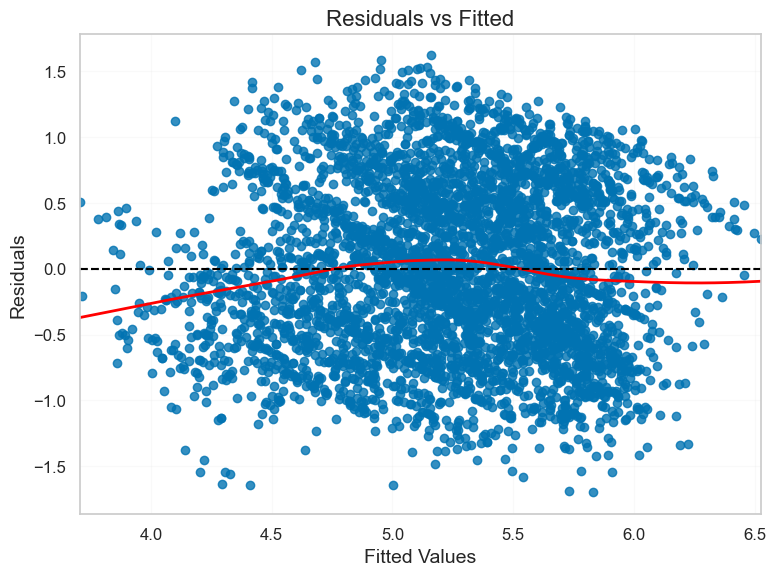

Normality of Residuals check:



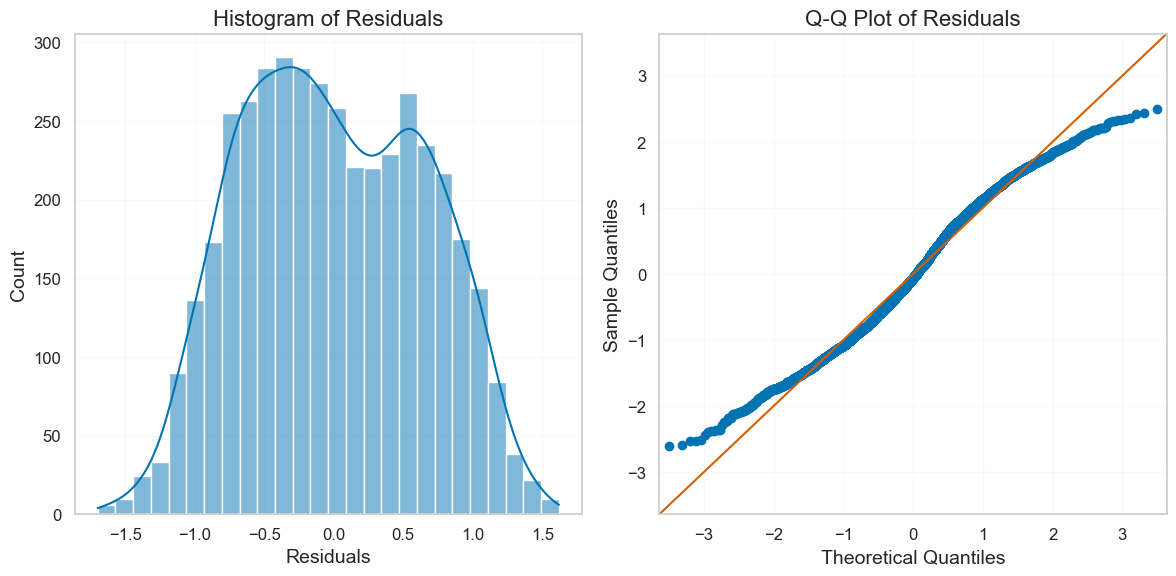

Autocorrelation of Residuals check


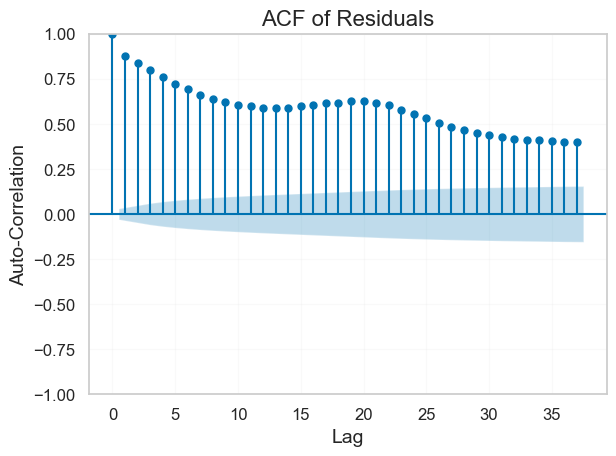

In [121]:

#------------------------------------------
# 1. Linearity and homoscedasticity check
#------------------------------------------
print('Linearity and homoscedasticity check:\n')
plt.figure(figsize=(8, 6))
sns.residplot(x=fitted_vals_cleaned, y=residuals_cleaned, lowess=True,
              line_kws={'color': 'red', 'lw': 2})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.axhline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()


#------------------------------------------
# 2. Normality of Residuals check
#------------------------------------------
print('Normality of Residuals check:\n')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(residuals_cleaned, kde=True, ax=ax1)
ax1.set_title("Histogram of Residuals")
ax1.set_xlabel("Residuals")

sm.qqplot(residuals_cleaned, line='45', fit=True, ax=ax2)
ax2.set_title("Q-Q Plot of Residuals")

plt.tight_layout()
plt.show()


#------------------------------------------
# 1. Autocorrelation of Residuals check
#------------------------------------------
print('Autocorrelation of Residuals check')
plot_acf(residuals_cleaned)
plt.title('ACF of Residuals')
plt.xlabel('Lag')
plt.ylabel('Auto-Correlation')
plt.tight_layout()
plt.show()

##### **INSIGHTS:**
* Results obtained are still not satisfactory. Thus we want to see whether results can be improved using Regularization techniques.

# **K. Regularization Techniques**

In [124]:
# Regularization Libraries
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score

In [125]:
# train test splitc
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, Y_cleaned_trans, test_size=0.2, random_state=42)

### **1. Ridge Regression**

In [127]:
ridge = RidgeCV(alphas=np.logspace(-3, 3, 300), cv=5)
model_ridge = ridge.fit(X_train, y_train)
ridge_r2 = ridge.score(X_test, y_test)

print(f" Ridge R²: {ridge_r2:.4f} | Best alpha: {ridge.alpha_}")

 Ridge R²: 0.3302 | Best alpha: 0.001


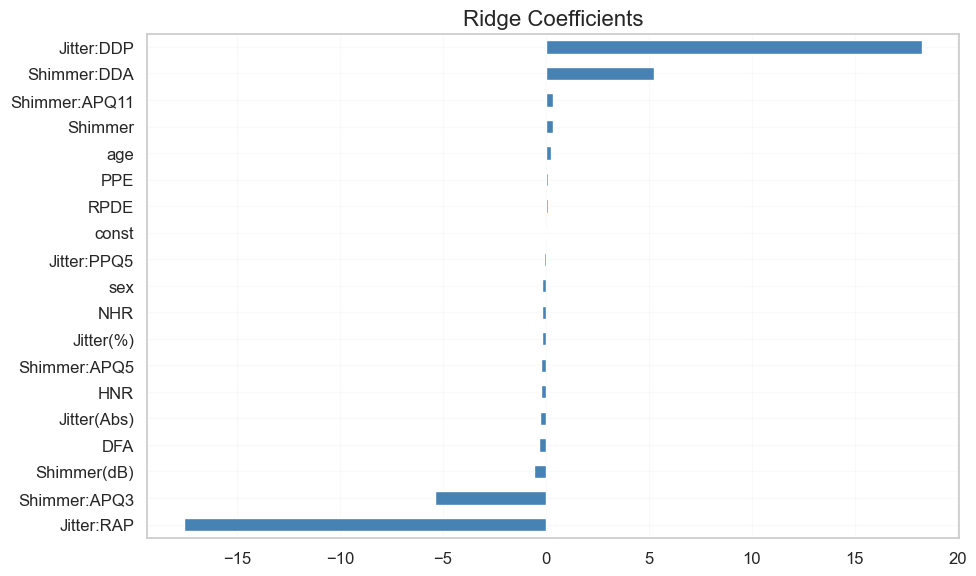

In [128]:
ridge_coef = pd.Series(ridge.coef_, index=X_train.columns)

plt.figure(figsize=(10,6))
ridge_coef.sort_values().plot(kind='barh', color='steelblue', label='Ridge')
plt.title("Ridge Coefficients")
plt.tight_layout()
plt.show()

##### **INSIGHTS:**
* Top +ve influencers:
  1. age - Most positively influential predictor
  2. PPE - Important voice-based feature increasing UPDRS
  3. shimmer:APQ11, Jitter:DDP, Jitter:RAP - others
* Top -ve influencers:
  1. HNR - Strongest negative effect
  2. DFA & Jitter(Abs) - Also have strong inverse relationships.
  3. sex - Being male seems associated with lower UPDRS.
* Less important predictors like Shimmer:APQ5, Jitter(%) are shrunk close to zero.
* No coefficients are completely zero (unlike Lasso), showing Ridge's coefficient shrinkage but not selection.
* The model captures general trends but misses complex patterns.
* Features from voice measurements (e.g., jitter, shimmer, RPDE, PPE) are crucial indicators of Parkinson’s symptoms.

### **2. Lasso Regression**

In [131]:
lasso = LassoCV(alphas=np.logspace(-3, 3, 100), cv=5, max_iter=10000)
model_lasso = lasso.fit(X_train, y_train)
lasso_r2 = lasso.score(X_test, y_test)

print(f" Lasso R²: {lasso_r2:.4f} | Best alpha: {lasso.alpha_}")

 Lasso R²: 0.3294 | Best alpha: 0.001


##### **INSIGHTS:**
* R² = 0.1510 → Lasso explains ~15.1% of the variance in total_UPDRS, nearly identical to Ridge.
* Best Alpha = 0.0142 → Very low regularization strength, meaning Lasso didn't penalize much due to weak feature sparsity.
* Performance is still relatively weak, indicating the model may miss non-linear patterns or key variables.

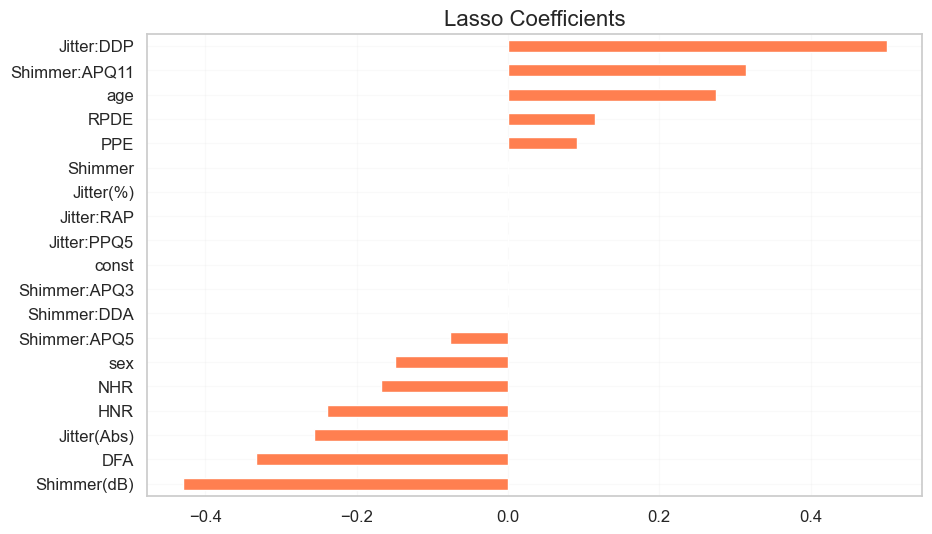

In [133]:
lasso_coef = pd.Series(lasso.coef_, index=X_train.columns)

plt.figure(figsize=(10,6))
lasso_coef.sort_values().plot(kind='barh', color='coral', label='Lasso')
plt.title("Lasso Coefficients")
plt.show()

##### **INSIGHTS:**
* Lasso shrinks several coefficients to zero (automatic feature selection).
* Features removed include:
  - shimmer:APQ3
  - Shimmer:DDA
  - Jitter:PPQ5
  - Shimmer(dB)
  - NHR
  - Shimmer:APQ5
  - Shimmer
  - These were retained in Ridge but are dropped by Lasso.
* age → Again, most dominant positive predictor of UPDRS.
* PPE, Shimmer:APQ11, Jitter:RAP, Jitter:DDP, RPDE → Features indicating vocal signal instability and signal-to-noise variation are positively linked to symptom severity.
* HNR → Still the strongest negative predictor, consistent with Ridge.
* DFA, Jitter(Abs), sex → Also negatively associated, implying smoother vocal patterns and possibly gender differences in UPDRS.


##### **COMPARISION TO RIDGE**:
* Ridge keeps all features but shrinks them; Lasso eliminates irrelevant ones.
* Despite this, R² is similar, indicating the dropped variables contribute minimally to predictive power.
* Lasso gives a simpler and more interpretable model, useful for identifying key predictors.

##### **CONCLUSION:**
* Features related to voice irregularities (**jitter, shimmer, RPDE, PPE**) are crucial indicators of Parkinson's symptoms.
* **age** consistently shows strong influence, confirming disease progression is age-related.

# **L. Random Forest Regressor**

In [138]:
from sklearn.ensemble import RandomForestRegressor

In [139]:
X_scaled.shape

(5875, 18)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df['total_UPDRS'], test_size=0.2)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate Model Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 10.1751
R² Score: 0.9133


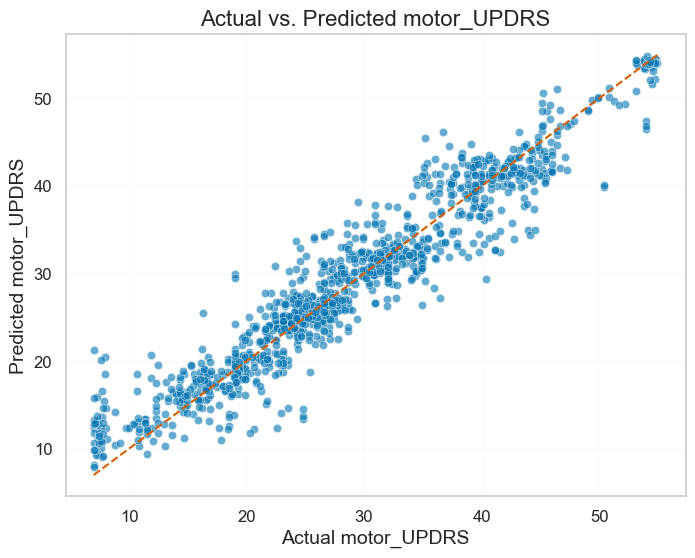

In [141]:
# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual motor_UPDRS")
plt.ylabel("Predicted motor_UPDRS")
plt.title("Actual vs. Predicted motor_UPDRS")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.show()

C:\Users\Aditya pandey\AppData\Local\Temp\ipykernel_6044\2950133911.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


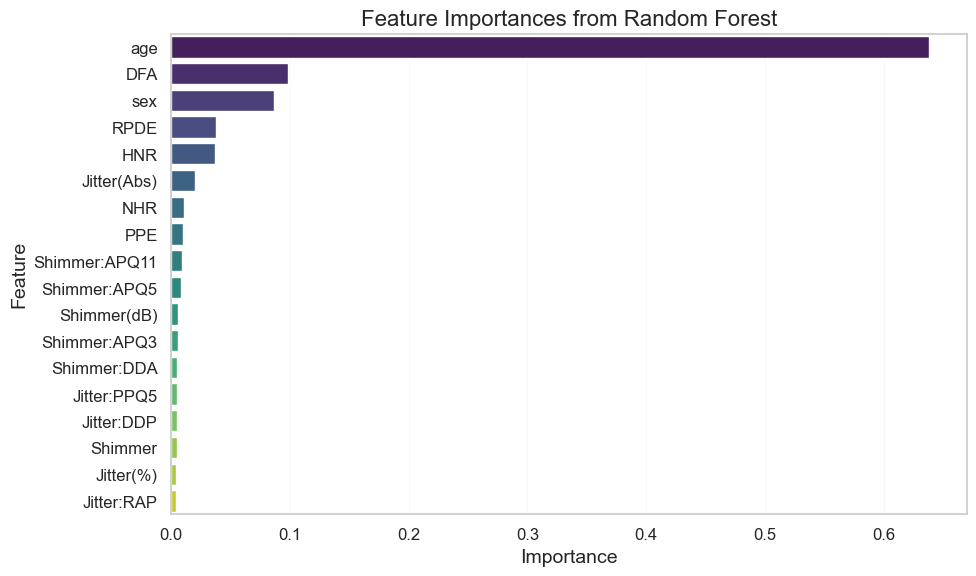

In [142]:
# Create a DataFrame for easy plotting
feature_importances = pd.DataFrame({
    'Feature': X_scaled.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importances from Random Forest')
plt.tight_layout()
plt.show()

# **M. K-fold validation - Random Forest Regressor**

In [144]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
from sklearn.metrics import make_scorer

In [145]:
# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42,n_jobs=-1,verbose=1)

# Define scoring metrics
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Perform Cross-Validation
y = df['total_UPDRS']
mse_scores = cross_val_score(rf_model, X, y, cv=kf, scoring=mse_scorer)
r2_scores = cross_val_score(rf_model, X, y, cv=kf, scoring=r2_scorer)

# Compute average scores
avg_mse = -np.mean(mse_scores)  # Convert negative MSE back to positive
avg_r2 = np.mean(r2_scores)

print(f"Cross-Validated Mean Squared Error (MSE): {avg_mse:.4f}")
print(f"Cross-Validated R² Score: {avg_r2:.4f}")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 18 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.8s finished
[Parallel(n_jobs=18)]: Using backend ThreadingBackend with 18 concurrent workers.
[Parallel(n_jobs=18)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=18)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 18 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.0s finished
[Parallel(n_jobs=18)]: Using backend ThreadingBackend with 18 concurrent workers.
[Parallel(n_jobs=18)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=18)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 18 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.7s
[Parallel(n

Cross-Validated Mean Squared Error (MSE): 9.7486
Cross-Validated R² Score: 0.9149


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.0s finished
[Parallel(n_jobs=18)]: Using backend ThreadingBackend with 18 concurrent workers.
[Parallel(n_jobs=18)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=18)]: Done 100 out of 100 | elapsed:    0.0s finished


##### **Conclusion:**
- Cross-Validated Mean Squared Error (MSE): 9.7592
- Cross-Validated R² Score: 0.9148

# **The END!!**